## Importer les jeux de données 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#### dataset classic3 
df1 = pd.read_csv('content/classic3.csv',usecols=['text','label'])
df1.head()

text label
0  Milestones in Cataloging In the case of the pr...  cisi
1  childhood psychosis. a description is given of...   med
2  neonatal hepatitis or familial neonatal obstru...   med
3  Handbook of Comparative Librarianship The firs...  cisi
4  Design and Evaluation of Information Systems T...  cisi

In [26]:
#### dataset classic3 
df2 = pd.read_csv('content/classic4.csv',usecols=['text','label'])
df2.head()

text label
0  Computer-Aided Analysis and Design of Informat...  cacm
1  Milestones in Cataloging In the case of the pr...  cisi
2  childhood psychosis. a description is given of...   med
3  neonatal hepatitis or familial neonatal obstru...   med
4  Handbook of Comparative Librarianship The firs...  cisi

In [27]:
#### dataset classic3 
df3 = pd.read_csv('content/bbc.csv',usecols=['text','label'])
df3.head()

text  label
0  England coach faces rap after row\n\nEngland c...  sport
1  Moody joins up with England\n\nLewis Moody has...  sport
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport
3  Henry tipped for Fifa award\n\nFifa president ...  sport
4  Arnesen denies rift with Santini\n\nTottenham ...  sport

# Analyse exploratoire des données

In [ ]:
# Y-a-t'il des articles vides dans le df1?
df1['text'].isnull().sum()

0

In [ ]:
# Y-a-t'il des articles vides dans le df2?
df2['text'].isnull().sum()

0

In [ ]:
# Y-a-t'il des articles vides dans le df3?
df3['text'].isnull().sum()

0

In [ ]:
# les catégories présente dans le df1
df1['label'].unique()

array(['cisi', 'med', 'cran'], dtype=object)

In [ ]:
# Combien d'article pour chaque catégorie dans le df1?
print("Nombre total d'article  :", df1.shape[0])
print("Nombre total d'article de catégorie cisi: ", df1[df1['label']=='cisi'].shape[0])
print("Nombre total d'article de catégorie med: ", df1[df1['label']=='med'].shape[0])
print("Nombre total d'article de catégorie cran: ", df1[df1['label']=='cran'].shape[0])


Nombre total d'article  : 3891
Nombre total d'article de catégorie cisi:  1460
Nombre total d'article de catégorie med:  1033
Nombre total d'article de catégorie cran:  1398


In [ ]:
# les catégories présente dans le df2
df2['label'].unique()

array(['cacm', 'cisi', 'med', 'cran'], dtype=object)

In [ ]:
# Combien d'article pour chaque catégorie dans le df2?
print("Nombre total d'article :", df2.shape[0])
print("Nombre total d'article de catégorie cacm : ", df2[df2['label']=='cacm'].shape[0])
print("Nombre total d'article de catégorie cisi: ", df2[df2['label']=='cisi'].shape[0])
print("Nombre total d'article de catégorie med: ", df2[df2['label']=='med'].shape[0])
print("Nombre total d'article de catégorie cran: ", df2[df2['label']=='cran'].shape[0])


Nombre total d'article : 7095
Nombre total d'article de catégorie cacm :  3204
Nombre total d'article de catégorie cisi:  1460
Nombre total d'article de catégorie med:  1033
Nombre total d'article de catégorie cran:  1398


In [ ]:
# les catégories présente dans le df3
df3['label'].unique()

array(['sport', 'entertainment', 'tech', 'business', 'politics'],
      dtype=object)

In [ ]:
# Combien d'article pour chaque catégorie dans le df3?
print("Nombre total d'article :", df3.shape[0])
print("Nombre total d'article de catégorie sport : ", df3[df3['label']=='sport'].shape[0])
print("Nombre total d'article de catégorie entertainment : ", df3[df3['label']=='entertainment'].shape[0])
print("Nombre total d'article de catégorie tech: ", df3[df3['label']=='tech'].shape[0])
print("Nombre total d'article de catégorie business: ", df3[df3['label']=='business'].shape[0])
print("Nombre total d'article de catégorie politics: ", df3[df3['label']=='politics'].shape[0])


Nombre total d'article : 2225
Nombre total d'article de catégorie sport :  511
Nombre total d'article de catégorie entertainment :  386
Nombre total d'article de catégorie tech:  401
Nombre total d'article de catégorie business:  510
Nombre total d'article de catégorie politics:  417


In [ ]:
# Combien de mots dans chaque article dans df1?
word_counts1 = df1['text'].apply(lambda x: len(x.split()))
word_counts1.describe()

count    3891.000000
mean      152.007196
std        81.663476
min        10.000000
25%        93.000000
50%       136.000000
75%       192.000000
max       689.000000
Name: text, dtype: float64

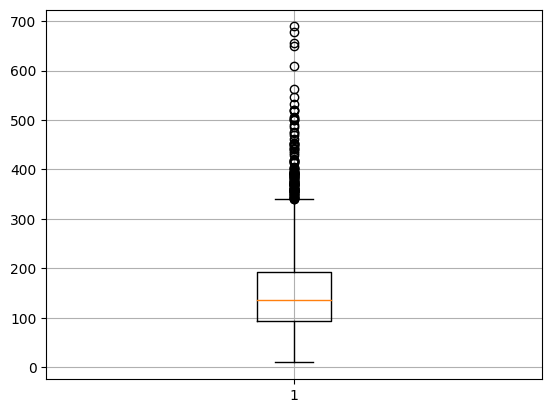

In [ ]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts1.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des articles ont entre 93 et 192 mots

In [ ]:
# Combien de mots dans chaque article dans df2?
word_counts2 = df2['text'].apply(lambda x: len(x.split()))
word_counts2.describe()

count    7095.000000
mean      107.446934
std        86.970008
min         1.000000
25%        37.000000
50%        98.000000
75%       154.000000
max       689.000000
Name: text, dtype: float64

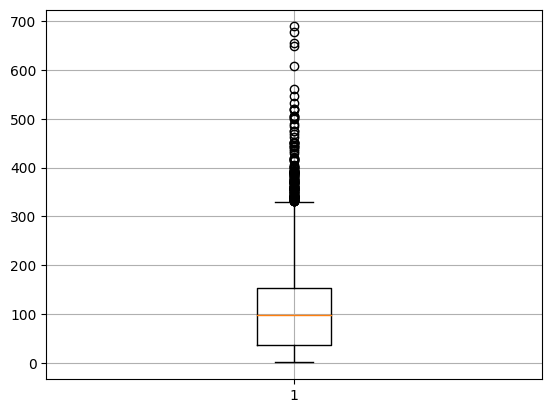

In [ ]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts2.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des articles ont entre 37 et 154 mots

In [ ]:
# Combien de mots dans chaque article dans df3?
word_counts3 = df3['text'].apply(lambda x: len(x.split()))
word_counts3.describe()

count    2225.000000
mean      384.040449
std       238.174497
min        89.000000
25%       246.000000
50%       332.000000
75%       471.000000
max      4432.000000
Name: text, dtype: float64

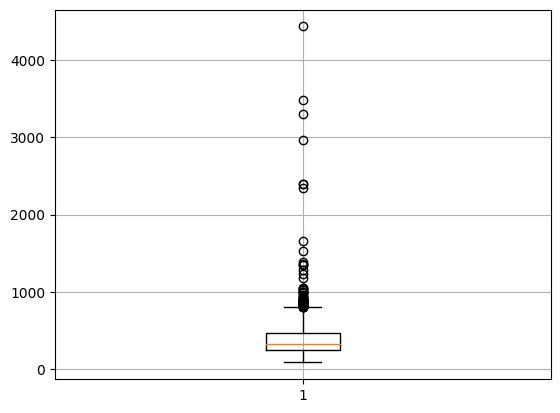

In [ ]:
import matplotlib.pyplot as plt
ax = plt.boxplot(word_counts3.values)
plt.grid(True)
plt.show()

# NB: 
# La plupart des articles ont entre 246 et 471 mots

# Pré-traitement des données textuelles 

On enchaîne dans la fonction data_preprocessing les méthodes de nettoyage classiques.
* Suppression des tag HTML
* Conservation des mots uniquement
* Passage en minuscule
* Suppression des mots vides
* Tokenization
* Lemmatisation
* Réassemblage des articles

In [28]:
import re
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # définir les stop_words
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # nettoyage des données
  article = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  article =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # miniscule
  article = article.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(article) # converts articles to tokens
  
  # stop_words removal
  article = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  article = [lemmatizer.lemmatize(word) for word in article]
  
  # join words in preprocessed review
  article = ' '.join(article)
  
  return article

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [29]:
# On applique le pré-traitement à nos données df1
df1['preprocessed_review'] = df1['text'].apply(lambda article: data_preprocessing(article))
df1.head()

text label  \
0  Milestones in Cataloging In the case of the pr...  cisi   
1  childhood psychosis. a description is given of...   med   
2  neonatal hepatitis or familial neonatal obstru...   med   
3  Handbook of Comparative Librarianship The firs...  cisi   
4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  
0  milestone cataloging case present study dr leh...  
1  childhood psychosis description given diagnost...  
2  neonatal hepatitis familial neonatal obstructi...  
3  handbook comparative librarianship first part ...  
4  design evaluation information system co joinin...

In [30]:
# On applique le pré-traitement à nos données df2
df2['preprocessed_review'] = df2['text'].apply(lambda article: data_preprocessing(article))
df2.head()

text label  \
0  Computer-Aided Analysis and Design of Informat...  cacm   
1  Milestones in Cataloging In the case of the pr...  cisi   
2  childhood psychosis. a description is given of...   med   
3  neonatal hepatitis or familial neonatal obstru...   med   
4  Handbook of Comparative Librarianship The firs...  cisi   

                                 preprocessed_review  
0  computer aided analysis design information sys...  
1  milestone cataloging case present study dr leh...  
2  childhood psychosis description given diagnost...  
3  neonatal hepatitis familial neonatal obstructi...  
4  handbook comparative librarianship first part ...

In [31]:
# On applique le pré-traitement à nos données df3
df3['preprocessed_review'] = df3['text'].apply(lambda article: data_preprocessing(article))
df3.head()

text  label  \
0  England coach faces rap after row\n\nEngland c...  sport   
1  Moody joins up with England\n\nLewis Moody has...  sport   
2  Ferguson fears Milan cutting edge\n\nMancheste...  sport   
3  Henry tipped for Fifa award\n\nFifa president ...  sport   
4  Arnesen denies rift with Santini\n\nTottenham ...  sport   

                                 preprocessed_review  
0  england coach face rap row england coach andy ...  
1  moody join england lewis moody flown dublin jo...  
2  ferguson fear milan cutting edge manchester un...  
3  henry tipped fifa award fifa president sepp bl...  
4  arnesen denies rift santini tottenham sporting...

### Vecteurs de mots pré-entraînés avec Word2Vec

le lien du modèle :  https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [ ]:
### donner accès à mon compte google 
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

La bibliothèque Gensim fournit des outils pour charger ce fichier. Plus précisément, vous pouvez appeler la fonction KeyedVectors.load_word2vec_format().

In [32]:
from gensim.models import KeyedVectors

on charge le modèle Word2Vec de Google.

In [33]:
filename= "/content/drive/MyDrive/GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
model['appel']

In [34]:
len(model['appel'])

300

In [35]:
import numpy as np
embeddings = []
for text in df1['preprocessed_review']:
    words = text.split()
    embedding = np.mean([model.get_vector(w) for w in words if w in model.key_to_index], axis=0)
    embeddings.append(embedding)
df1_embeddings = pd.DataFrame(embeddings)
df1_embeddings['label'] = df1['label']

In [9]:
# Enregistrement en CSV
df1_embeddings.to_csv('w2v_R/df1_embeddings_w2v.csv', index=False)

In [41]:
## df2 
import numpy as np

embeddings = []
for text in df2['preprocessed_review']:
    words = text.split()
    vectors = [model.get_vector(w) for w in words if w in model.key_to_index]
    if vectors:
        embedding = np.mean(vectors, axis=0)
        embeddings.append(embedding)
    else:
        # handle the case where no words are found in the vocabulary
        embeddings.append(np.zeros(model.vector_size))

df2_embeddings = pd.DataFrame(embeddings)
df2_embeddings['label'] = df2['label']

In [128]:
# Enregistrement en CSV
df2_embeddings.to_csv('w2v_R/df2_embeddings_w2v.csv', index=False)

In [37]:
## df3
import numpy as np
embeddings = []
for text in df3['preprocessed_review']:
    words = text.split()
    embedding = np.mean([model.get_vector(w) for w in words if w in model.key_to_index], axis=0)
    embeddings.append(embedding)

df3_embeddings = pd.DataFrame(embeddings)
df3_embeddings['label'] = df3['label']

In [201]:
# Enregistrement en CSV
df3_embeddings.to_csv('w2v_R/df3_embeddings_w2v.csv', index=False)

une fois nous avons la représentation word2vec des articles nous pouvons maintenant passer a l'étape de réduction de dimension 

# Classic3 Dataset


---



---



# Partie 1 : Approche Tandem

##1. Kmeans++



### 1.1 Espace d'origine 

In [11]:
from sklearn.cluster import KMeans
# Définir le nombre de clusters
num_clusters = 3
# Créer l'objet KMeans avec l'initialisation K-means++
kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
# Appliquer le K-means++ sur les données d'embedding
kmeans_pp.fit(df1_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_pp = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df1['label']
# Calculer la NMI
nmi_kpp_origine = normalized_mutual_info_score(true_labels, labels_pp)
# Calculer l'ARI
ari_kpp_origine = adjusted_rand_score(true_labels, labels_pp)
print("NMI de Kmeans++ dans l'espace d'origine  : " , nmi_kpp_origine )
print("ARI de Kmeans++ dans l'espace d'origine  : : " , ari_kpp_origine )

NMI de Kmeans++ dans l'espace d'origine  :  0.8540881104988143
ARI de Kmeans++ dans l'espace d'origine  : :  0.8927756308384632


### 1.2. PCA 

Elbow method:

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

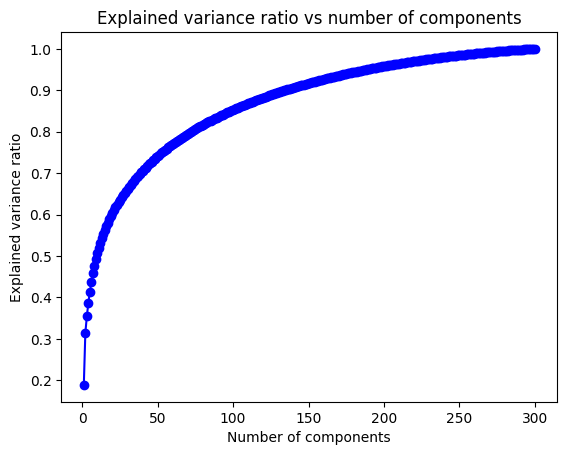

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA on embeddings
pca.fit(df1_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 50 composantes qui expliquent plus de 70% de la variance. Au-delà de 50, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 50.

In [ ]:
from sklearn.decomposition import PCA

# Define the number of components to keep
n_components = 50

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df1_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df1_pca = pd.DataFrame(pca.transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_pca['label'] = df1['label']

# Rename columns
df1_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

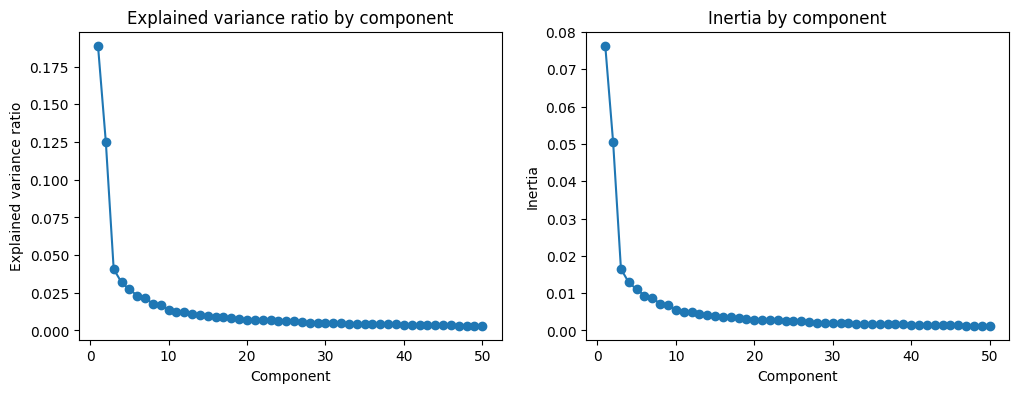

In [ ]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

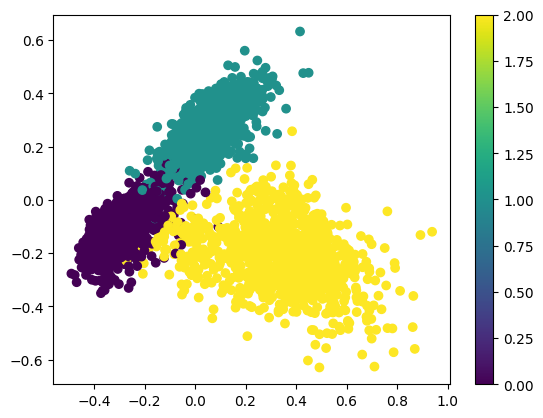

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df1_pca['label'] = le.fit_transform(df1_pca['label'])

# Plot scatter plot
plt.scatter(df1_pca['PC1'], df1_pca['PC2'], c=df1_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 20 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons clairement distinguer les trois groupes.

In [ ]:
# Fit the model on the data
kmeans_pp.fit(df1_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

# Get the centroids of each cluster
centroids = kmeans_pp.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kpp_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kpp_pca)

NMI pour kmeans++ avec la PCA: 0.8530612905808098
ARI pour kmeans++ avec la PCA : 0.8919352858616973


### 1.3.  t-SNE

Le t-SNE est une méthode de réduction de dimensionnalité qui diffère de la PCA en ce qu'elle vise à conserver les structures de proximité non linéaires dans les données. Cette méthode est souvent utilisée pour la visualisation de données en deux ou trois dimensions, car elle est particulièrement utile pour la détection des relations non linéaires entre les points de données. En comparaison avec la PCA, le t-SNE a une complexité de calcul plus élevée et est plus lent à exécuter, mais peut être plus utile dans certains scénarios où la relation entre les données est non linéaire. Nous allons donc essayer de réduire les dimensions de nos données avec t-SNE pour voir si cela peut améliorer notre clustering.

In [ ]:
from sklearn.manifold import TSNE
# Initialize t-SNE object
tsne = TSNE(n_components=2)
# Fit and transform t-SNE on embeddings
df1_tsne = pd.DataFrame(tsne.fit_transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_tsne['label'] = df1['label']

# Rename columns
df1_tsne.columns = ['x', 'y', 'label']

In [ ]:
df1_tsne

x          y label
0    -13.938656 -20.835926  cisi
1     20.168875 -29.778028   med
2     26.072994 -26.362812   med
3    -13.702334 -25.460886  cisi
4    -27.447119 -14.124496  cisi
...         ...        ...   ...
3886  15.179641 -28.250799   med
3887  -2.393858 -33.545753  cisi
3888 -20.775681 -40.897179  cisi
3889   6.361129  55.435425  cran
3890  28.145857 -22.062521   med

[3891 rows x 3 columns]

In [ ]:
# Fit KMeans on t-SNE embeddings
kmeans_pp.fit(df1_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


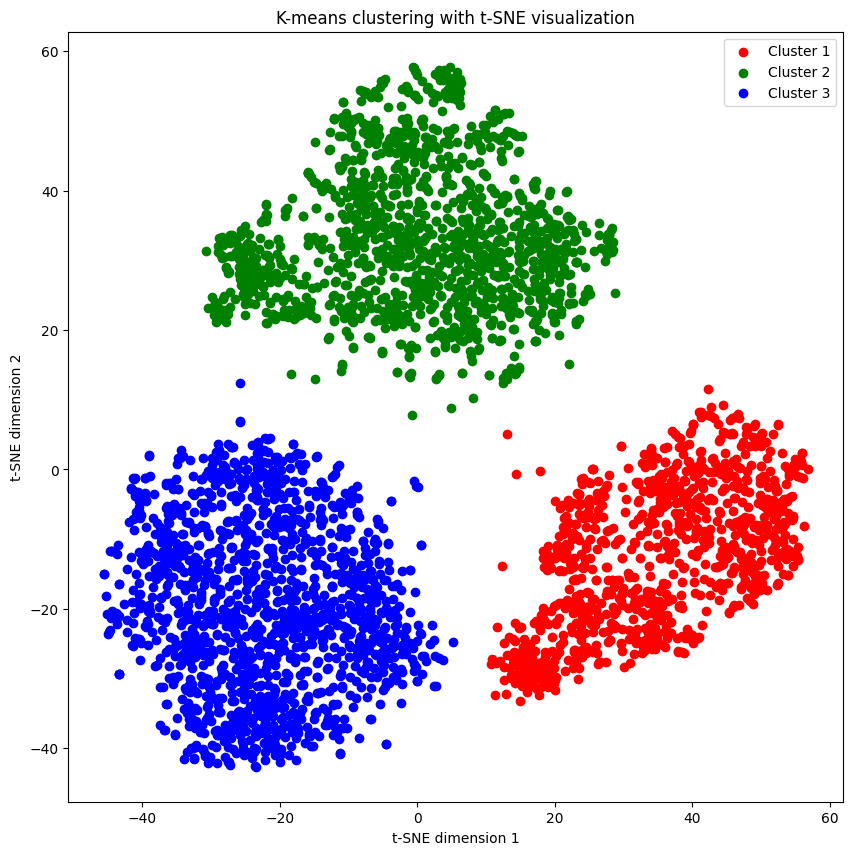

In [ ]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Loop over each cluster and plot the points
for i in range(3):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df1_tsne.iloc[cluster_indices]['x'], 
               df1_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les trois clusters. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit. Cependant, le choix du nombre optimal de composantes reste un défi pour t-SNE, car il dépend des données et peut nécessiter des tests empiriques.

In [ ]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la t-SNE", nmi_kpp_tsne)
print("ARI pour Kmeans++ avec la t-SNE:", ari_kpp_tsne)

NMI pour Kmeans++ avec la t-SNE 0.9569129679763918
ARI pour Kmeans++ avec la t-SNE: 0.977655868579099


On constate que les scores NMI et ARI pour les clusters de k-means++ appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

### 1.4. UMAP

UMAP (Uniform Manifold Approximation and Projection) est une méthode de réduction de dimensionnalité non linéaire qui vise à préserver la structure globale des données. Contrairement aux méthodes de réduction de dimensionnalité linéaires telles que PCA et t-SNE, UMAP utilise une approche probabiliste basée sur la théorie de l'information pour créer une représentation en deux ou trois dimensions des données. UMAP est particulièrement utile pour les données complexes et non linéaires, et peut être utilisé pour la visualisation, la clustering, la détection d'anomalies et d'autres applications d'apprentissage automatique. Nous allons donc l'utiliser pour voir si cette méthode permet d'obtenir des résultats encore meilleurs que ceux obtenus avec PCA et t-SNE.

In [ ]:
! pip install umap-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import umap

# Define the number of components to keep
n_components = 50
# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df1_umap = pd.DataFrame(umap_obj.fit_transform(df1_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df1_umap['label'] = df1['label']

# Rename columns
df1_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [ ]:
# Fit KMeans on Umap embeddings
kmeans_pp.fit(df1_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la UMAP:", nmi_kpp_umap)
print("ARI pour Kmeans++ avec la UMAP:", ari_kpp_umap)

NMI pour Kmeans++ avec la UMAP: 0.9557525803414018
ARI pour Kmeans++ avec la UMAP: 0.97705704609762


### 1.5. Autoencodeurs

Après avoir essayé les méthodes traditionnelles de réduction de dimension comme l'ACP, le t-SNE et l'UMAP, il peut être intéressant d'essayer l'autoencodeur pour réduire la dimensionnalité de nos données. Contrairement aux méthodes traditionnelles qui se basent sur des projections linéaires ou non linéaires, l'autoencodeur utilise une architecture de réseau de neurones qui peut capturer des relations non linéaires et des interactions complexes entre les variables. Cela peut donner lieu à un espace de représentation plus discriminant et peut-être mieux adapté pour la tâche de clustering. De plus, les autoencodeurs ont la capacité d'apprendre des représentations latentes des données, ce qui peut nous aider à comprendre les caractéristiques sous-jacentes des données qui ont un impact sur la similarité entre les observations.

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
# Normalize data
df1_norm = (df1_embeddings.iloc[:, :-1] - df1_embeddings.iloc[:, :-1].mean()) / df1_embeddings.iloc[:, :-1].std()
# Define input shape
input_shape = df1_norm.shape[1]
# Define encoding dimension
encoding_dim = 50
# Define input layer
input_layer = Input(shape=(input_shape,))
# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)
# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)
# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)
# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
# Train autoencoder model
autoencoder.fit(df1_norm, df1_norm, epochs=100, batch_size=32, verbose=0)
# Define encoder model
encoder = Model(input_layer, encoding_layer)
# Encode data
df1_encoded = pd.DataFrame(encoder.predict(df1_norm))
# Add label column to the new dataframe
df1_encoded['label'] = df1['label']
# Rename columns
df1_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

122/122 [==============================] - 0s 1ms/step


In [ ]:
# Fit KMeans on this embeddings
kmeans_pp.fit(df1_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)
print("NMI pour le Kmeans++ avec le Autoencodeurs :", nmi_kpp_auto)
print("ARI pour le Kmeans++ avec le Autoencodeurs :", ari_kpp_auto)

NMI pour le Kmeans++ avec le Autoencodeurs : 0.8429147990982271
ARI pour le Kmeans++ avec le Autoencodeurs : 0.8807252606856039


## 2. Kmedoids

### 2.1. Espace d'origine 

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_extra.cluster import KMedoids
# Définir le nombre de clusters
num_clusters = 3
# Créer l'objet KMeans avec l'initialisation K-means++
kmedoids = KMedoids(n_clusters=num_clusters, metric='cosine', init='random')
# Appliquer l'algorithme aux données
kmedoids.fit(df1_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_kmedoids = kmedoids.labels_

In [ ]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df1['label']
# Calculer la NMI
nmi_kmoids_origine = normalized_mutual_info_score(true_labels, labels_kmedoids)
# Calculer l'ARI
ari_kmoids_origine = adjusted_rand_score(true_labels, labels_kmedoids)
print("NMI de Kmedoids dans l'espace d'origine  : " , nmi_kmoids_origine )
print("ARI de Kmedoids dans l'espace d'origine  : : " , ari_kmoids_origine )

NMI de Kmedoids dans l'espace d'origine  :  0.5595573595263396
ARI de Kmedoids dans l'espace d'origine  : :  0.5105411589438665


### 2.2. PCA 

comme nous avons préciser précédament nous allons utiliser 50 composantes pour la PCA

In [ ]:
# Fit the model on the data
kmedoids.fit(df1_pca.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_
# Get the centroids of each cluster
centroids = kmedoids.cluster_centers_

In [ ]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kmoids_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kmoids_pca)

NMI pour kmeans++ avec la PCA: 0.8496153171305678
ARI pour kmeans++ avec la PCA : 0.8927047914897769


### 2.3. t-SNE 

In [ ]:
# Fit KMeans on t-SNE embeddings
kmedoids.fit(df1_tsne.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

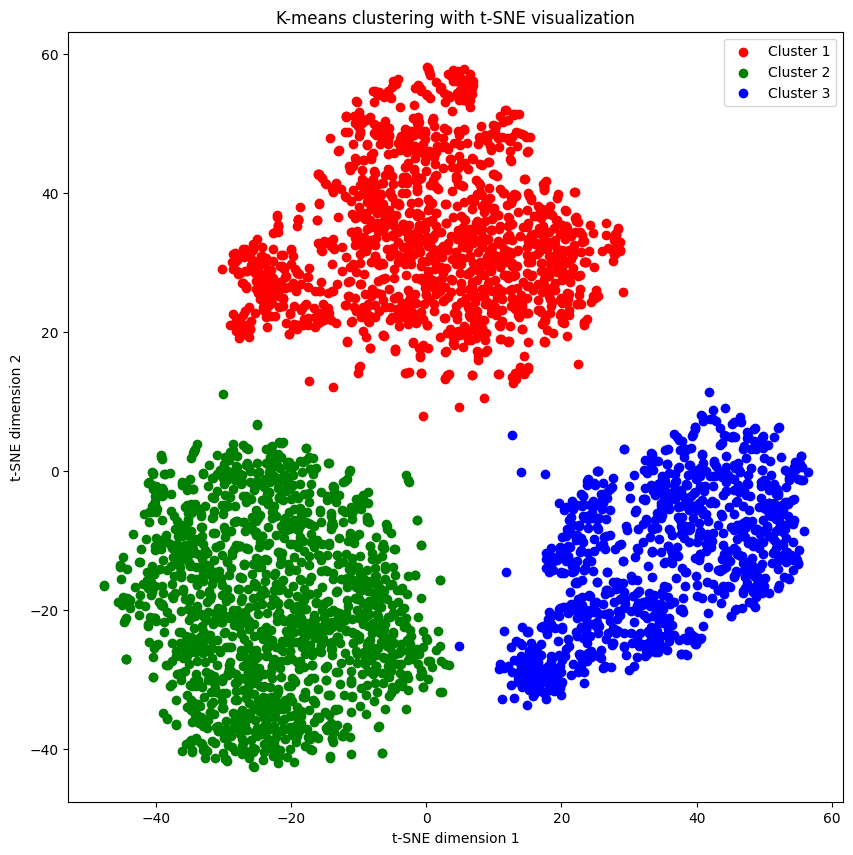

In [ ]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b']

# Loop over each cluster and plot the points
for i in range(3):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df1_tsne.iloc[cluster_indices]['x'], 
               df1_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [ ]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la t-SNE", nmi_kmoids_tsne)
print("ARI pour Kmedoids avec la t-SNE:", ari_kmoids_tsne)

NMI pour Kmedoids avec la t-SNE 0.9580626300703745
ARI pour Kmedoids avec la t-SNE: 0.9783789825570363


On constate que les scores NMI et ARI pour les clusters de **kmedoids** appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

### 2.4. UMAP

In [ ]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df1_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [ ]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la UMAP:", nmi_kmoids_umap)
print("ARI pour Kmedoids avec la UMAP:", ari_kmoids_umap)

NMI pour Kmedoids avec la UMAP: 0.9557525803414018
ARI pour Kmedoids avec la UMAP: 0.97705704609762


### 2.5. Autoencodeur 

In [ ]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df1_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [ ]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)
print("NMI pour le kmedoids avec le Autoencodeurs :", nmi_kmoids_auto)
print("ARI pour le kmedoids avec le Autoencodeurs :", ari_kmoids_auto)

NMI pour le kmedoids avec le Autoencodeurs : 0.8390981785313183
ARI pour le kmedoids avec le Autoencodeurs : 0.8920217316263445


## 3. Spherical  Kmeans

Nous allons maintenant refaire toutes les étapes avec l'algorithme de clustering Spherical KMeans, après avoir utilisé KMeans++ et KMedoids sur tous les espaces que nous avons explorés précédemment. Nous verrons si les résultats de clustering sont meilleurs ou pires avec cette méthode de clustering par rapport à KMeans et KMedoids.

### 3.1. Espace d'origine 

In [ ]:
!pip install coclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from coclust.clustering.spherical_kmeans import SphericalKmeans
# Set the number of clusters
n_clusters = 3
# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df1_embeddings.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_



In [ ]:
nmi_ksph_origine = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_origine = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI de SphericalKmeans dans l'espace d'origine :", nmi_ksph_origine)
print("ARI de SphericalKmeans dans l'espace d'origine:", ari_ksph_origine)

NMI de SphericalKmeans dans l'espace d'origine : 0.886460572203821
ARI de SphericalKmeans dans l'espace d'origine: 0.9246277023180752


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids et Kmeans++.

 En effet, la méthode Spherical KMeans a une approche différente de la méthode KMedoids en termes de choix des centroids initiaux et de la distance utilisée pour regrouper les données. Spherical KMeans utilise une distance cosinus normalisée pour prendre en compte la similarité entre les données, ce qui est particulièrement utile pour des données textuelles. Par conséquent, il est plus adapté pour regrouper des données textuelles que la méthode KMedoids qui utilise une distance euclidienne.

### 3.2. PCA

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_pca = df1_pca.iloc[:, :-1].to_numpy()
#Fit the model on the data
spherical_kmeans.fit(X_pca)
#Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

 == New init == 
iteration: 0
603.4755297112617
iteration: 1
1851.825902928726
iteration: 2
2079.6433270761177
iteration: 3
2323.99421068866
iteration: 4
2337.298977062841
iteration: 5
2337.4268640472965
iteration: 6
2337.4305214015494
iteration: 7
2337.4357808615755
iteration: 8
2337.4371837318463
iteration: 9


In [ ]:
nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI de SphericalKmeans avec la PCA :", nmi_ksph_pca)
print("ARI de SphericalKmeans avec la PCA:", ari_ksph_pca)

NMI de SphericalKmeans avec la PCA : 0.8991085845757334
ARI de SphericalKmeans avec la PCA: 0.9333575451838612


### 3.3. t-SNE 

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_tsne = df1_tsne.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X_tsne)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

 == New init == 
iteration: 0
1976.68604182422
iteration: 1
2928.1789379780735
iteration: 2
2991.975531949098
iteration: 3
3015.9204937636223
iteration: 4
3086.8574299323377
iteration: 5
3341.9244224244967
iteration: 6
3569.449664529733
iteration: 7
3582.0423242617453
iteration: 8
3582.0961968855736
iteration: 9


In [ ]:
nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la t-SNA:", nmi_ksph_tsne)
print("ARI de SphericalKmeans avec la t-SNA:", ari_ksph_tsne)

NMI de SphericalKmeans avec la t-SNA: 0.9580626300703745
ARI de SphericalKmeans avec la t-SNA: 0.9783789825570363


### 3.4. UMAP

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_umap = df1_umap.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X_umap)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

 == New init == 
iteration: 0
3842.406216702502
iteration: 1
3889.0186144117743
iteration: 2
3889.170033441428
iteration: 3


In [ ]:
nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la UMAP:", nmi_ksph_umap)
print("ARI de SphericalKmeans avec la UMAP:", ari_ksph_umap)

NMI de SphericalKmeans avec la UMAP: 0.9557525803414018
ARI de SphericalKmeans avec la UMAP: 0.97705704609762


## 4. CAH 

Il peut être intéressant d'appliquer la classification hiérarchique ascendante (CAH) aux différents espaces de données que nous avons réduits, après avoir utilisé les méthodes de clustering k-means, k-medoids et spherical k-means. L'application de CAH peut permettre d'obtenir une vue plus globale des données en regroupant les différents clusters formés par les méthodes de clustering en sous-groupes plus larges, ce qui peut aider à mieux comprendre la structure des données.

Pour chaque espace (original et réduit par différentes méthodes), nous allons appliquer la CAH avec chacune des méthodes d'agrégation disponibles:

La méthode de liaison simple (single linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus proches.

La méthode de liaison complète (complete linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus éloignés.

La méthode de liaison moyenne (average linkage) : fusionne les clusters qui ont la plus petite distance moyenne entre tous leurs membres.

La méthode de Ward : minimise la variance totale des clusters fusionnés.

De cette façon, nous pourrons comparer les performances des différentes méthodes d'agrégation et trouver la méthode qui donne les meilleurs résultats pour chaque espace.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### 4.1. Espace d'origine 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.907598255948838
NMI score: 0.8785394233946203
-------------------------------
Linkage method: complete
ARI score: 0.21571878179267134
NMI score: 0.35394751305950334
-------------------------------
Linkage method: average
ARI score: 0.00020431252333266158
NMI score: 0.0017269593893236156
-------------------------------
Linkage method: single
ARI score: -8.399913211891288e-05
NMI score: 0.0009429316285541333
-------------------------------


### 4.2. PCA 

In [ ]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.9122765184778552
NMI score: 0.8804249615385843
-------------------------------
Linkage method: complete
ARI score: 0.3368033947556071
NMI score: 0.4766292000447191
-------------------------------
Linkage method: average
ARI score: 0.00023377872988522764
NMI score: 0.0012486640198584092
-------------------------------
Linkage method: single
ARI score: -8.399913211891288e-05
NMI score: 0.0009429316285541333
-------------------------------


### 4.3. t-SNE

In [ ]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.977655868579099
NMI score: 0.9569129679763918
-------------------------------
Linkage method: complete
ARI score: 0.977655868579099
NMI score: 0.9569129679763918
-------------------------------
Linkage method: average
ARI score: 0.9769334075435561
NMI score: 0.9557869159555387
-------------------------------
Linkage method: single
ARI score: 0.6024864663555554
NMI score: 0.7201729143975633
-------------------------------


### 4.4. UMAP 

In [ ]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.97705704609762
NMI score: 0.955752580341402
-------------------------------
Linkage method: complete
ARI score: 0.97705704609762
NMI score: 0.9557525803414018
-------------------------------
Linkage method: average
ARI score: 0.97705704609762
NMI score: 0.9557525803414018
-------------------------------
Linkage method: single
ARI score: 0.97705704609762
NMI score: 0.955752580341402
-------------------------------


En effet, dans l'espace réduit par t-SNE UMAP, nous observons que les résultats des quatre méthodes de liaison sont très similaires, avec des scores ARI et NMI élevés pour toutes les méthodes. Cela peut être dû au fait que cette distribution de données est bien séparée et que l'effet de chaîne n'est peut-être pas présent, ce qui rend les résultats moins sensibles au choix de la méthode de liaison. De plus, il est possible que la méthode de lien Single donne des résultats catastrophiques pour les autres espaces, car elle peut être très sensible aux valeurs aberrantes et à l'existence de groupes dispersés. Dans ces espace réduit par t-SNE et UMAP, il se peut que ces facteurs n'affectent pas autant la performance de la méthode de liaison Single, conduisant ainsi à des résultats similaires à ceux des autres méthodes de liaison.

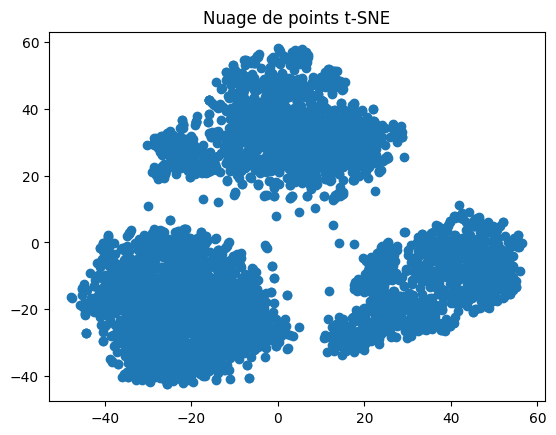

In [ ]:
plt.scatter(df1_tsne.iloc[:, 0], df1_tsne.iloc[:, 1])
plt.title("Nuage de points t-SNE")
plt.show()

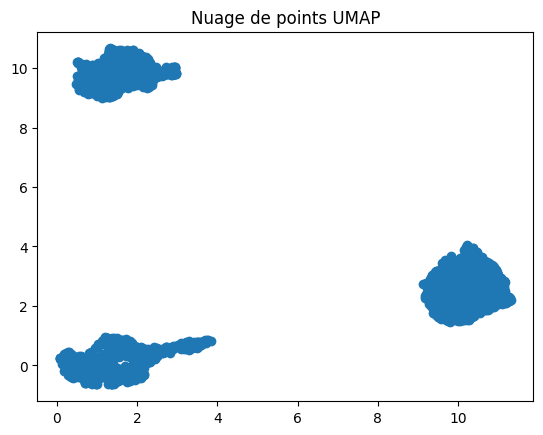

In [ ]:
plt.scatter(df1_umap.iloc[:, 0], df1_umap.iloc[:, 1])
plt.title("Nuage de points UMAP")
plt.show()

### 4.5. Autoencodeur

In [ ]:
# Set the number of clusters
n_clusters = 3

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df1_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.9002143094478752
NMI score: 0.8676531492089428
-------------------------------
Linkage method: complete
ARI score: 0.2868689033851288
NMI score: 0.42116383146597597
-------------------------------
Linkage method: average
ARI score: 8.711202434485509e-05
NMI score: 0.0011057821616722544
-------------------------------
Linkage method: single
ARI score: -8.399913211891288e-05
NMI score: 0.0009429316285541333
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original et dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, il est important de noter que la méthode de liaison "single" a obtenu les pires résultats dans toutes les situations. Ceci peut être dû à l'effet de chaîne, où chaque nouvel élément est fusionné avec le groupe le plus proche, sans tenir compte de la structure globale des données. Les meilleurs résultats ont été obtenus dans l'espace réduit par UMAP et t-SNE, comme pour les autres méthodes de clustering.

En somme, les résultats de la CAH ont montré que la méthode de liaison "ward" est la plus appropriée pour les données de notre ensemble de données, et que les espaces réduits par UMAP et t-SNE offrent des résultats de clustering similaires aux autres méthodes. Ces résultats suggèrent que la combinaison de techniques de réduction de dimensionnalité et de clustering peut être une approche efficace pour explorer la structure de données complexes et faciliter l'analyse de grandes quantités de données.

In [ ]:
# récuperer les meilleures scores pour chaque espace.
ari_cah_origine=0.907598255948838
nmi_cah_origine=0.8785394233946203 
ari_cah_pca=0.9021030013408975
nmi_cah_pca=0.8707713717020579
ari_cah_tsne=0.977655868579099
nmi_cah_tsne= 0.9569129679763918 
ari_cah_umap=0.97705704609762
nmi_cah_umap=0.955752580341402 
ari_cah_auto=0.8982147886676468
nmi_cah_auto=0.8656023190419639

## Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [ ]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['origine', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method        CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                       
auto     0.898215  0.892022  0.880725        0.939807  0.865602  0.839098   
origine  0.907598  0.510541  0.891274        0.924628  0.878539  0.559557   
pca      0.902103  0.892705  0.891935        0.933358  0.870771  0.849615   
tsne     0.977656  0.978379  0.977656        0.978379  0.956913  0.958063   
umap     0.977057  0.977057  0.977057        0.977057  0.955753  0.955753   

                                   
method   KMeans++ KMeansSpherical  
space                              
auto     0.842915        0.905324  
origine  0.852461        0.886461  
pca      0.853061        0.899109  
tsne     0.956913        0.958063  
umap     0.955753        0.955753

<Figure size 1000x600 with 0 Axes>

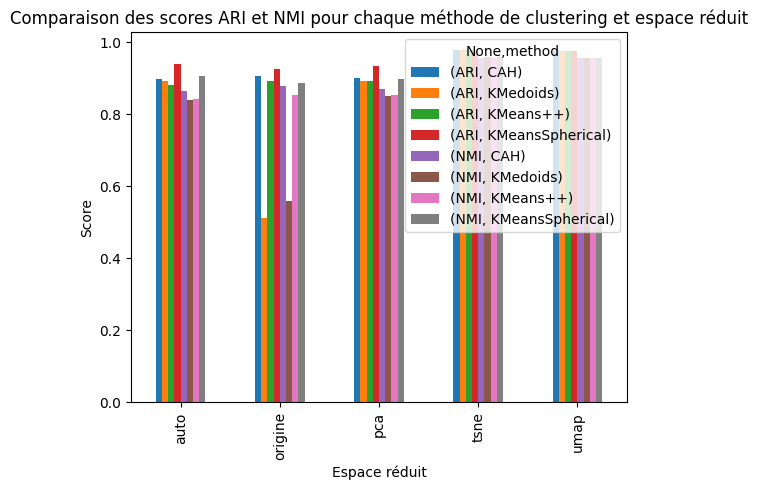

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode "spherical KMeans" a donné les meilleurs résultats en termes de scores ARI et NMI pour tous les espaces réduits et même l'espace d'origine. Cela peut s'expliquer par le fait que cette méthode est capable de gérer les clusters de forme non sphérique, contrairement à la méthode standard KMeans qui suppose que les clusters sont sphériques. Ainsi, cette méthode a pu mieux capturer la structure des données et obtenir des clusters plus précis et plus homogènes.

### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode Spherical KMeans dans l'espace T-SNE, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

 == New init == 
iteration: 0
2056.679976144367
iteration: 1
2928.625582761885
iteration: 2
2989.64316892999
iteration: 3
3012.519542266896
iteration: 4
3080.7976779282308
iteration: 5
3335.9528149279813
iteration: 6
3568.2322293140405
iteration: 7
3580.670863948055
iteration: 8
3580.718642803723
iteration: 9


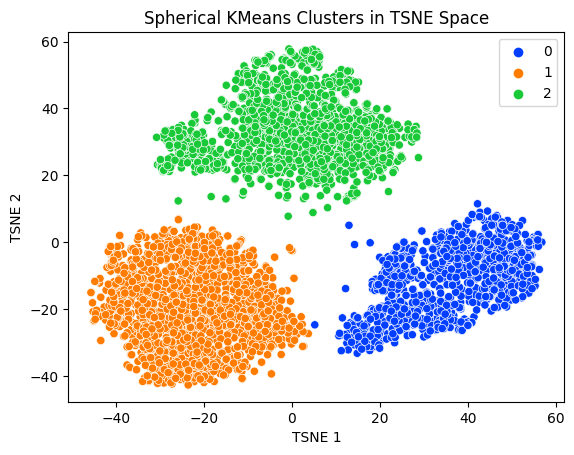

In [ ]:
import seaborn as sns

spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_tsne = df1_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X_tsne)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df1_tsne.iloc[:, 0], y=df1_tsne.iloc[:, 1], hue=spherical_kmeans_labels, palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Spherical KMeans Clusters in TSNE Space')

# Show the plot
plt.show()

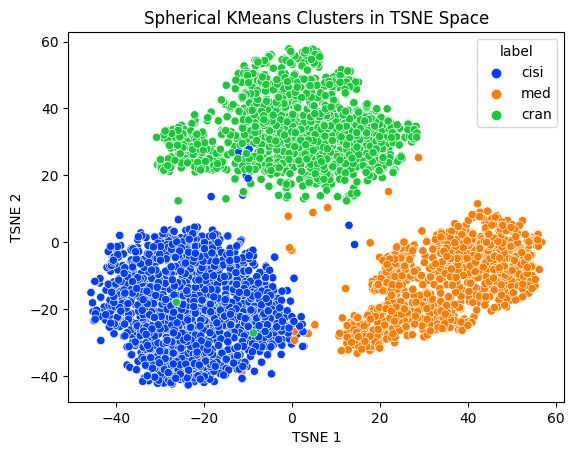

In [ ]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df1_tsne.iloc[:, 0], y=df1_tsne.iloc[:, 1], hue=df1_tsne['label'], palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Spherical KMeans Clusters in TSNE Space')

# Show the plot
plt.show()

En examinant les deux nuages de points, nous pouvons remarquer que les points du cluster 0 sont principalement concentrés dans la partie inférieure à droite du graphique. Ce cluster correspond à la classe "med" dans la variable "label" de notre dataframe. De même, les points du cluster 1 sont principalement regroupés dans la partie inférieure gauche du graphique, correspondant à la classe "cisi". Enfin, les points du cluster 2 sont concentrés dans la partie supérieure du graphique, correspondant à la classe "cran". Ces observations indiquent que le clustering a réussi à regrouper les données en fonction de leur appartenance à l'une des trois classes de la variable "label". Cela montre que le modèle de clustering Spherical KMeans appliqué sur l'espace TSNE a été efficace pour séparer les données en fonction de leurs caractéristiques, en permettant d'identifier des groupes similaires au sein de chaque classe.

In [ ]:
df1['cluster']=spherical_kmeans_labels
df1['label_num']= df1["label"].replace({"med": 0, "cisi": 1, "cran": 2})
df1.head()

Unnamed: 0                                               text label  \
0           0  Milestones in Cataloging In the case of the pr...  cisi   
1           1  childhood psychosis. a description is given of...   med   
2           2  neonatal hepatitis or familial neonatal obstru...   med   
3           3  Handbook of Comparative Librarianship The firs...  cisi   
4           4  Design and Evaluation of Information Systems T...  cisi   

                                 preprocessed_review  \
0  milestone cataloging case present study dr leh...   
1  childhood psychosis description given diagnost...   
2  neonatal hepatitis familial neonatal obstructi...   
3  handbook comparative librarianship first part ...   
4  design evaluation information system co joinin...   

                                                 vec  cluster  label_num  
0  [0.011844032689144737, 0.0012762504711485746, ...        1          1  
1  [-0.016183406748670214, -0.04885020154587766, ...        0          0  
2  [-0.04544477320429104, 0.08622482641419368, -0...        0          0  
3  [0.03373888314488423, 0.006372888404202749, 0....        1          1  
4  [-0.09044997160099755, -0.008212507263688017, ...        1          1

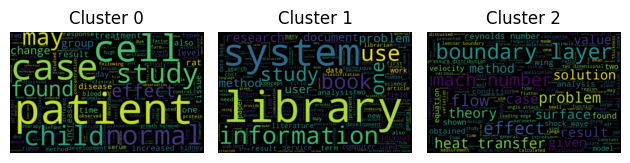

In [ ]:
from wordcloud import WordCloud

# Définir les trois clusters
clusters = [0, 1, 2]

# Boucle pour créer les nuages de mots pour chaque cluster
for i, c in enumerate(clusters):
    
    # Sélectionner les articles du cluster
    words_list = df1[df1['cluster'] == c]['preprocessed_review'].unique().tolist()
    words = " ".join(words_list)
    
    # Créer le nuage de mots pour le cluster
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(words)
    
    # Créer le subplot correspondant au cluster
    plt.subplot(1, 3, i+1)
    
    # Afficher le nuage de mots sur le subplot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Cluster {c}")
    
# Afficher la figure
plt.tight_layout()
plt.show()

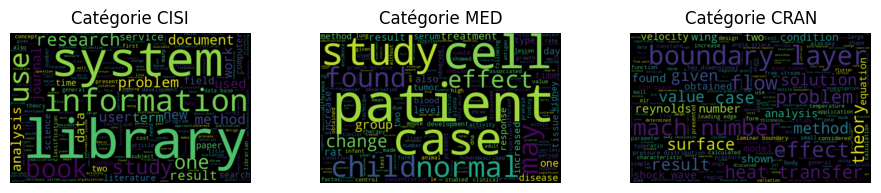

In [ ]:
# Define the categories
categories = df1['label'].unique()

# Create a dictionary to store the word clouds for each category
wordclouds = {}

# Loop through the categories and create a word cloud for each one
for category in categories:
    words_list = df1[df1['label'] == category]['preprocessed_review'].unique().tolist()
    pos_words = " ".join(words_list)
    wordcloud = WordCloud(width=800, height=500, stopwords=stop_words).generate(pos_words)
    wordclouds[category] = wordcloud

# Display the word clouds
fig, axs = plt.subplots(1, len(categories), figsize=(10, 4))
for i, category in enumerate(categories):
    axs[i].imshow(wordclouds[category], interpolation='bilinear')
    axs[i].set_title(f'Catégorie {category.upper()}')
    axs[i].axis("off")
plt.tight_layout(pad=5)
plt.show()

Après avoir effectué l'analyse de distribution des mots sur les trois classes et les trois clusters, nous avons constaté que les résultats étaient cohérents. Le cluster 0 correspondait à la classe "med", le cluster 1 correspondait à la classe "cisi", et le cluster 2 correspondait à la classe "cran". Ces résultats confirment la pertinence de la classification et la qualité des clusters obtenus.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assign numerical values to the label column
df1['label_num'] = df1['label'].map({'med': 0, 'cisi': 1, 'cran': 2})
# Create confusion matrix between label_num and cluster columns
conf_mat = confusion_matrix(df1['label_num'], df1['cluster'])
# Calculate accuracy score
accuracy = accuracy_score(df1['label_num'], df1['cluster'])
print("Confusion matrix:")
print(conf_mat)
print("Accuracy:", accuracy)

Confusion matrix:
[[1019    9    5]
 [   2 1450    8]
 [   0    3 1395]]
Accuracy: 0.9930609097918273


Après ce calcul avec une accuracy, on peut être certain que le cluster 0 correspond à la classe "med", le cluster 1 à la classe "cisi" et le cluster 2 à la classe "cran". Ce résultat montre que le clustering était parfait, car tous les points ont été correctement attribués à leurs classes correspondantes.

### Nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### 1. Elbow method

1. Espace d'origine 

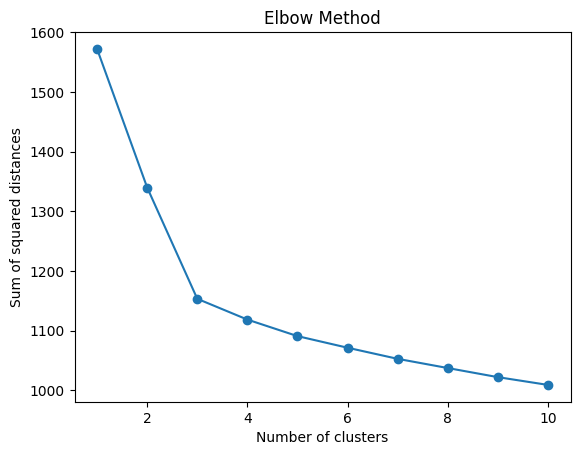

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

on remarque ici que le coude du graphe est le 3 donc nous avons choisie le nombre optimal de cluster pour l'espace d'origine 

2. PCA

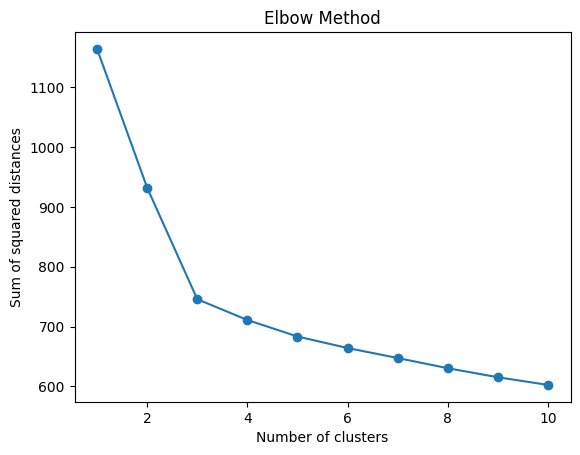

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

on remarque ici que le coude du graphe est le 3 donc nous avons choisie le nombre optimal de cluster pour l'espace réduit PCA

3. t-SNE 

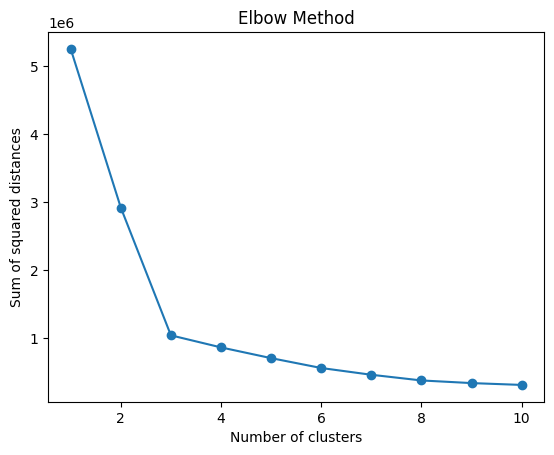

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

on remarque ici que le coude du graphe est le 3 donc nous avons choisie le nombre optimal de cluster pour l'espace réduit t-SNE

4. UMAP

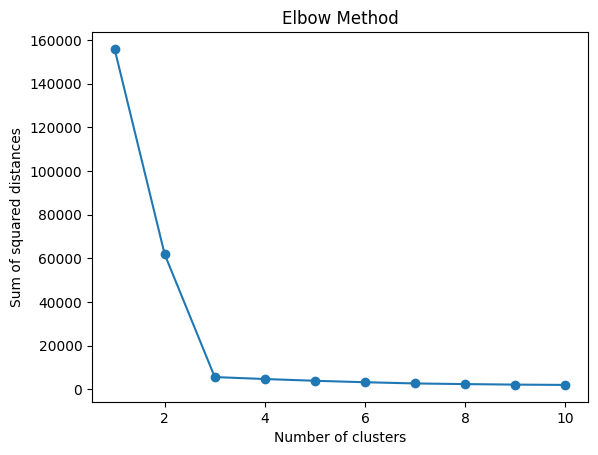

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

on remarque ici que le coude du graphe est le 3 donc nous avons choisie le nombre optimal de cluster pour l'espace réduit UMAP

5. Autoencodeur 

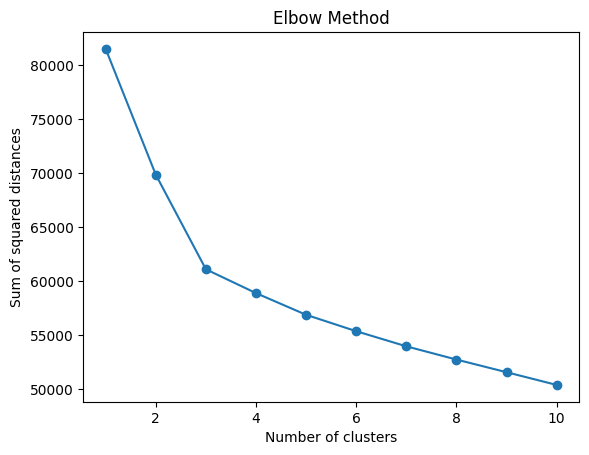

In [ ]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

### 2. Silhouette method 

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

In [ ]:
from sklearn.metrics import silhouette_score

1. Espace d'origine 

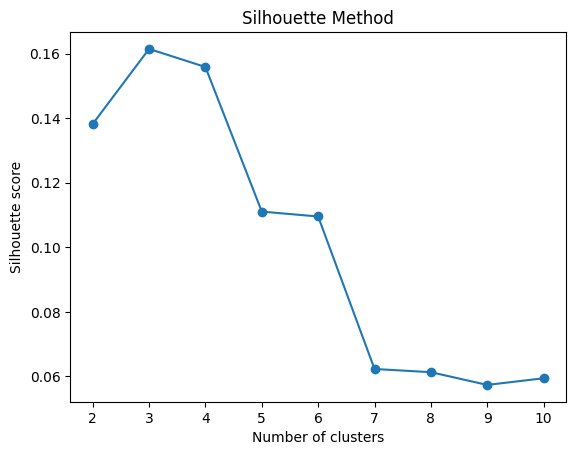

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df1_embeddings.iloc[:, :-1])
    silhouette_avg = silhouette_score(df1_embeddings.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

on remarque sur le graphe que le score maximal est attiend quand le nombre de cluster est egal à 3 

2. PCA 

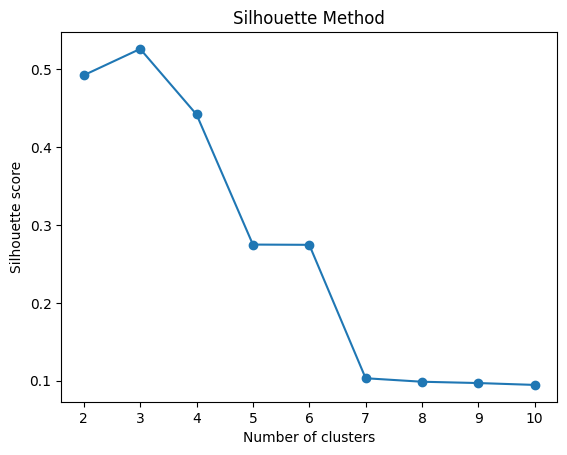

In [ ]:
from sklearn.metrics import silhouette_score

# Convert DataFrame to NumPy array
X_pca = df1_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

on remarque sur le graphe que le score maximal est attiend quand le nombre de cluster est egal à 3

3. t-SNE 

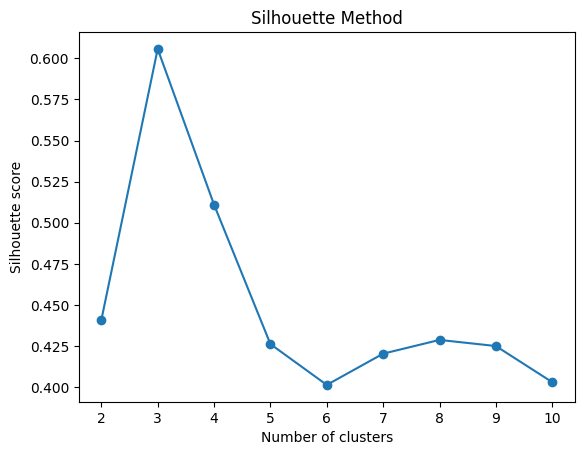

In [ ]:
# Convert DataFrame to NumPy array
X_tsne = df1_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

on remarque sur le graphe que le score maximal est attiend quand le nombre de cluster est egal à 3

4. UMAP

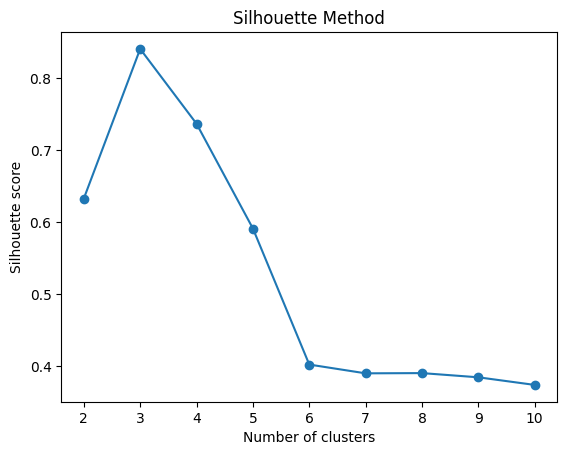

In [ ]:
# Convert DataFrame to NumPy array
X_umap = df1_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

on remarque sur le graphe que le score maximal est attiend quand le nombre de cluster est egal à 3

5. Autoencodeur 

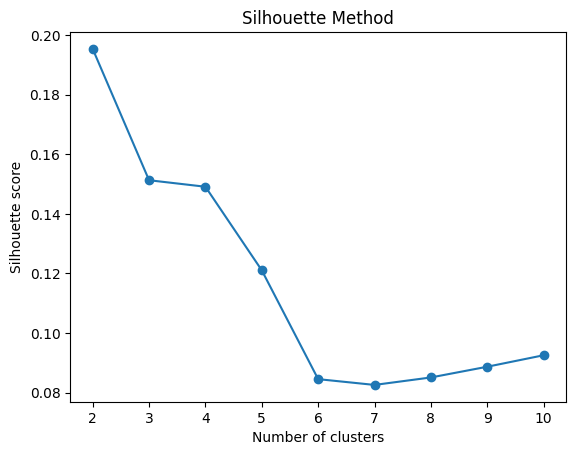

In [ ]:
# Convert DataFrame to NumPy array
X_auto = df1_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_auto)
    silhouette_avg = silhouette_score(X_auto, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

# Partie 2 : Approche jointe/simultanée

## 1. Reduced Kmeans

Nous avons utilisé la bibliothèque R "clustrd" [2] pour appliquer des méthodes combinant simultanément les méthodes de réduction de dimension et de clustering. Pour ce faire, nous avons écrit un script R qui nous donne les labels de clusters pour chaque dataframe et les enregistre dans un fichier txt. Nous utiliserons ensuite Python pour étudier les performances.

Les fonctions clusmca() et cluspca() sont toutes deux des fonctions de la librairie R clustrd qui combinent des méthodes de réduction de dimension et de clustering pour effectuer l'analyse de cluster.

La différence entre les deux fonctions est le type de méthode de réduction de dimension qu'elles utilisent. clusmca() utilise l'analyse en composantes multiples (MCA) pour réduire la dimension des données, tandis que cluspca() utilise l'analyse en composantes principales (PCA).

L'analyse en composantes multiples est une méthode de réduction de dimension qui est utilisée pour les données catégorielles et nominales, tandis que l'analyse en composantes principales est utilisée pour les données quantitatives et continues.

Comme notre jeu de données est purement numérique (embedded data), il n'est pas nécessaire d'utiliser clusmca() car cette fonction est conçue pour les données catégorielles et nominales. Nous allons plutôt utiliser cluspca() qui utilise l'analyse en composantes principales (PCA) pour réduire la dimension des données.

In [ ]:
### Code R ###
#install.packages("clustrd")
#library(clustrd)
#df1_embeddings <- read.csv("df1_embeddings.csv")
#nbclus=3
#ndim=50
#outRKM = cluspca(df1_embeddings[, 1:(ncol(df1_embeddings)-1)]
#, nbclus, ndim, method = "RKM", rotation = "varimax", scale = FALSE, nstart = 10)
#
#
#true_labels = df1_embeddings[101]
#
## Obtenir les étiquettes de cluster à partir de la sortie de cluspca
#
#cluster_labels <- outRKM$cluster
#
#cluster_labels-1
#
#write.table(cluster_labels-1, "cluster_labels.txt", row.names = FALSE, col.names = FALSE)

In [1]:
with open("w2v_R/cluster_labels.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['0', '2', '2', '0', '0', '1', '0', '1', '1', '1', '1', '2', '0', '0', '0', '2', '0', '0', '1', '1', '2', '1', '2', '0', '2', '0', '0', '0', '2', '0', '1', '0', '0', '1', '1', '2', '1', '2', '1', '2', '1', '0', '1', '1', '1', '0', '0', '0', '1', '2', '0', '1', '1', '1', '2', '2', '0', '1', '2', '1', '0', '2', '0', '2', '2', '1', '0', '0', '1', '0', '2', '1', '0', '0', '2', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '2', '0', '1', '1', '2', '0', '1', '0', '0', '1', '1', '1', '1', '0', '2', '2', '1', '1', '2', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '2', '2', '2', '2', '0', '1', '1', '2', '0', '2', '1', '2', '1', '2', '0', '0', '2', '0', '1', '0', '0', '2', '1', '0', '0', '0', '1', '0', '1', '0', '2', '1', '1', '0', '1', '1', '1', '2', '0', '0', '0', '0', '2', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '2', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '2', '2', '0', '1', '0', '2', '1', '1', '2', '1', '1', '0',

In [ ]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats sont identiques à ceux obtenus en appliquant la réduction de dimension avec PCA, puis en appliquant K-means++ avec NMI : 0,817 et ARI : 0,870. Cela démontre l'efficacité de la fonction cluspca dans la combinaison de ces deux méthodes. En effet, cluspca utilise la PCA pour réduire la dimensionnalité de la donnée numérique, puis applique une méthode de clustering sur les composantes principales pour trouver les groupes similaires. Ces résultats confirment la validité de l'approche cluspca et montrent clairement comment cette méthode fonctionne.

##Deep Kmeans 

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier **dkm.py** ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py

Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d CLASSIC3 -p`**

On a eu un ARI = 0.92, un NMI = 0,89 et une accuracy de 0.97

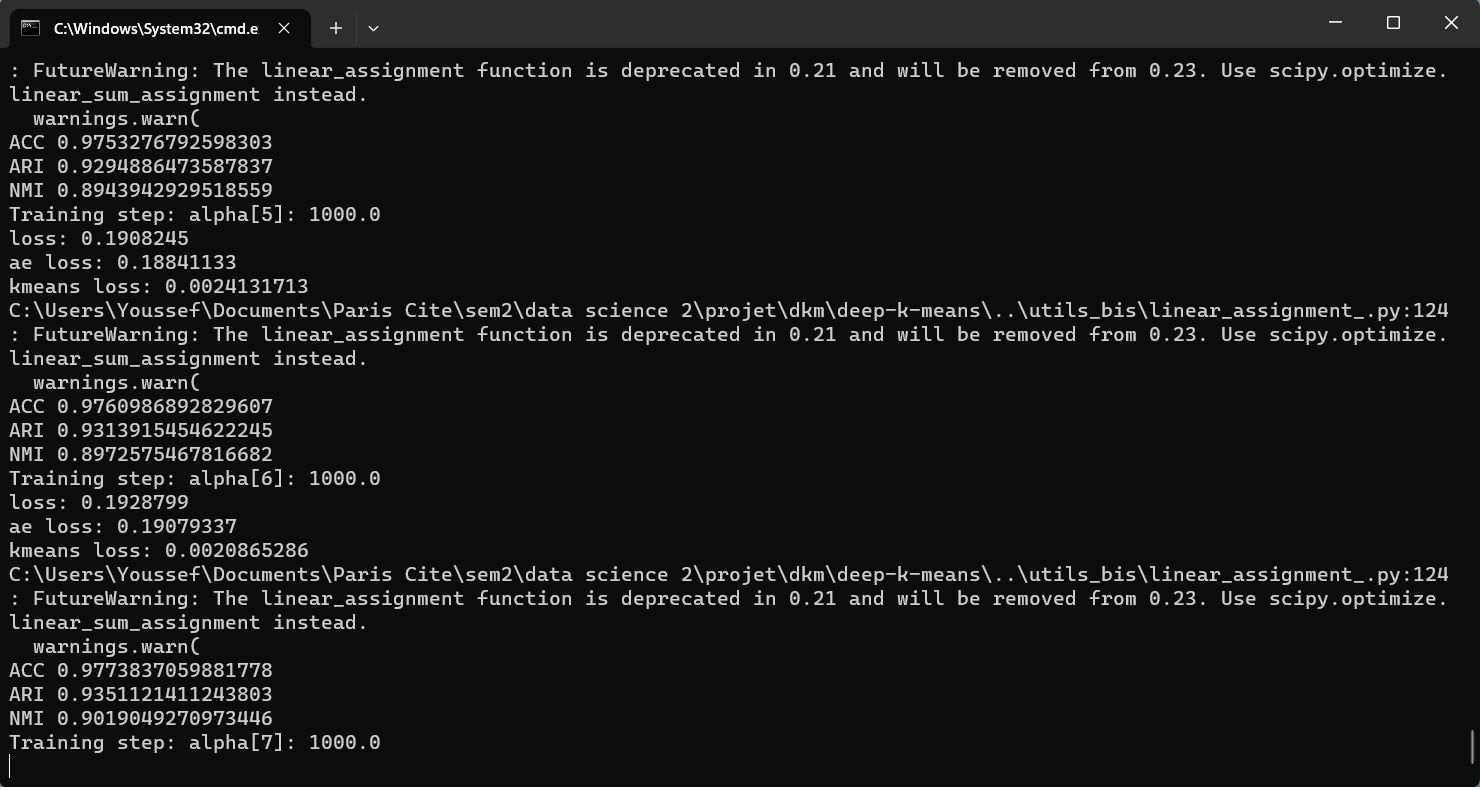

Les résultats obtenus avec cette méthode sont globalement satisfaisants. Cependant, il est important de souligner que cette méthode est relativement complexe, notamment en termes de temps d'exécution. De plus, nous ne sommes pas encore très familiers avec les concepts sous-jacents du deep learning, ce qui peut rendre la mise en œuvre de cette méthode plus difficile pour nous.

En outre, il convient de noter que les méthodes classiques semblent fournir de meilleurs résultats en termes de NMI, ARI et accuracy. C'est pourquoi nous avons finalement opté pour l'utilisation de ces méthodes plus traditionnelles dans notre étude. Toutefois, cela ne signifie pas que nous excluons la possibilité d'utiliser des méthodes de deep learning à l'avenir si cela s'avère nécessaire ou pertinent pour nos travaux futurs.

# Classic4 Dataset


---



---







# Partie 1 : Approche Tandem

##1. Kmeans++



### 1.1 Espace d'origine 

In [42]:
from sklearn.cluster import KMeans
# Définir le nombre de clusters
num_clusters = 4
# Créer l'objet KMeans avec l'initialisation K-means++
kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
# Appliquer le K-means++ sur les données d'embedding
kmeans_pp.fit(df2_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_pp = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df2['label']
# Calculer la NMI
nmi_kpp_origine = normalized_mutual_info_score(true_labels, labels_pp)
# Calculer l'ARI
ari_kpp_origine = adjusted_rand_score(true_labels, labels_pp)
print("NMI de Kmeans++ dans l'espace d'origine  : " , nmi_kpp_origine )
print("ARI de Kmeans++ dans l'espace d'origine  : : " , ari_kpp_origine )

NMI de Kmeans++ dans l'espace d'origine  :  0.4810817286284358
ARI de Kmeans++ dans l'espace d'origine  : :  0.3309901061625286


### 1.2. PCA 

Elbow method:

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

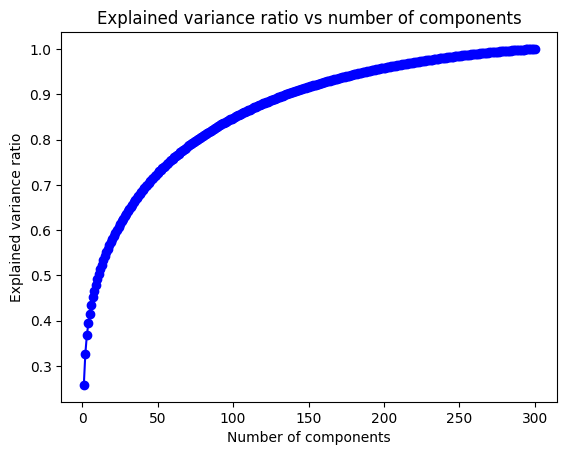

In [44]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA on embeddings
pca.fit(df2_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 50 composantes qui expliquent plus de 70% de la variance. Au-delà de 50, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 50.

In [45]:
from sklearn.decomposition import PCA

# Define the number of components to keep
n_components = 50

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df2_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df2_pca = pd.DataFrame(pca.transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_pca['label'] = df2['label']

# Rename columns
df2_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

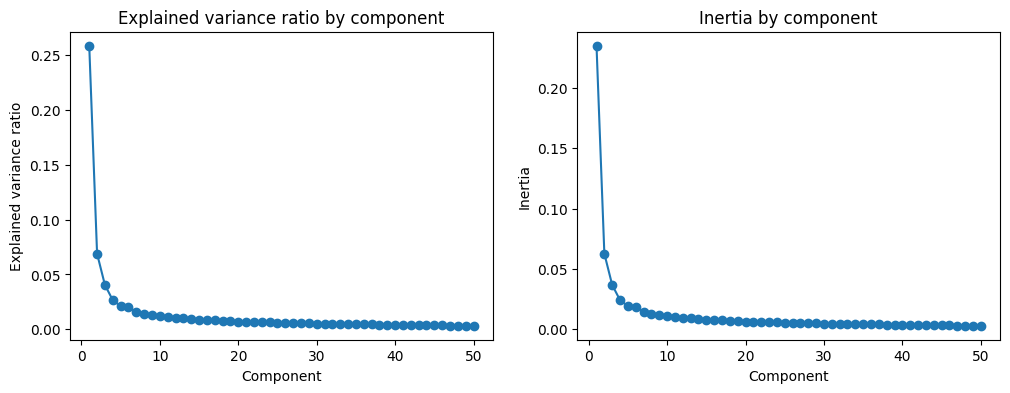

In [46]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

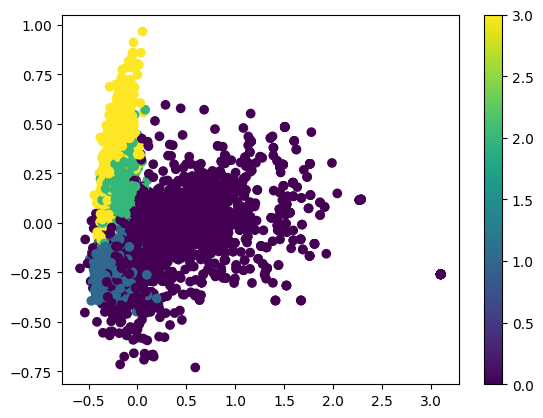

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df2_pca['label'] = le.fit_transform(df2_pca['label'])

# Plot scatter plot
plt.scatter(df2_pca['PC1'], df2_pca['PC2'], c=df2_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 20 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons clairement distinguer les quatre groupes.

In [48]:
# Fit the model on the data
kmeans_pp.fit(df2_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

# Get the centroids of each cluster
centroids = kmeans_pp.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kpp_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kpp_pca)

NMI pour kmeans++ avec la PCA: 0.4806053404834129
ARI pour kmeans++ avec la PCA : 0.3308061355889668


### 1.3.  t-SNE

Le t-SNE est une méthode de réduction de dimensionnalité qui diffère de la PCA en ce qu'elle vise à conserver les structures de proximité non linéaires dans les données. Cette méthode est souvent utilisée pour la visualisation de données en deux ou trois dimensions, car elle est particulièrement utile pour la détection des relations non linéaires entre les points de données. En comparaison avec la PCA, le t-SNE a une complexité de calcul plus élevée et est plus lent à exécuter, mais peut être plus utile dans certains scénarios où la relation entre les données est non linéaire. Nous allons donc essayer de réduire les dimensions de nos données avec t-SNE pour voir si cela peut améliorer notre clustering.

In [50]:
from sklearn.manifold import TSNE
# Initialize t-SNE object
tsne = TSNE(n_components=2)
# Fit and transform t-SNE on embeddings
df2_tsne = pd.DataFrame(tsne.fit_transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_tsne['label'] = df2['label']

# Rename columns
df2_tsne.columns = ['x', 'y', 'label']

In [51]:
df2_tsne

x          y label
0     32.725300   9.450377  cacm
1      5.728580  53.584518  cisi
2    -23.901440  44.269596   med
3    -30.670738  43.315212   med
4      9.825619  51.149029  cisi
...         ...        ...   ...
7090 -33.797321  39.569309   med
7091  16.134350  42.737041  cacm
7092  48.414474 -44.621246  cacm
7093  -0.481127  24.123388  cacm
7094 -13.790355  -8.402456  cacm

[7095 rows x 3 columns]

In [52]:
# Fit KMeans on t-SNE embeddings
kmeans_pp.fit(df2_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


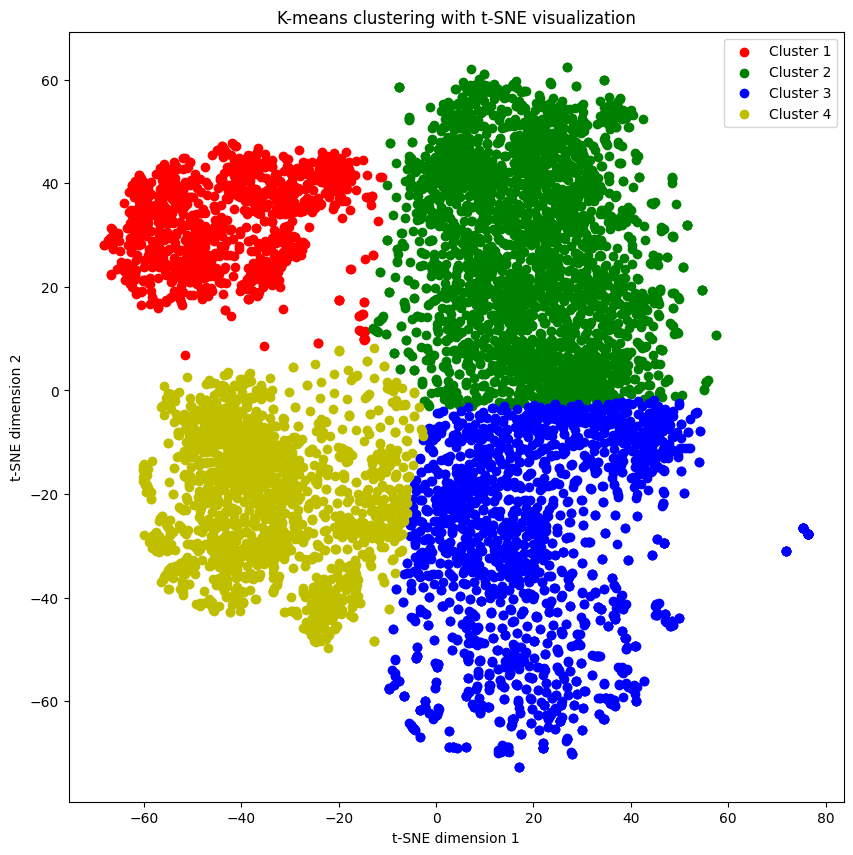

In [53]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y']

# Loop over each cluster and plot the points
for i in range(4):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df2_tsne.iloc[cluster_indices]['x'], 
               df2_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les quatre clusters. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit. Cependant, le choix du nombre optimal de composantes reste un défi pour t-SNE, car il dépend des données et peut nécessiter des tests empiriques.

In [54]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la t-SNE", nmi_kpp_tsne)
print("ARI pour Kmeans++ avec la t-SNE:", ari_kpp_tsne)

NMI pour Kmeans++ avec la t-SNE 0.6662693419694395
ARI pour Kmeans++ avec la t-SNE: 0.5398896328272054


On constate que les scores NMI et ARI pour les clusters de k-means++ appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

### 1.4. UMAP

UMAP (Uniform Manifold Approximation and Projection) est une méthode de réduction de dimensionnalité non linéaire qui vise à préserver la structure globale des données. Contrairement aux méthodes de réduction de dimensionnalité linéaires telles que PCA et t-SNE, UMAP utilise une approche probabiliste basée sur la théorie de l'information pour créer une représentation en deux ou trois dimensions des données. UMAP est particulièrement utile pour les données complexes et non linéaires, et peut être utilisé pour la visualisation, la clustering, la détection d'anomalies et d'autres applications d'apprentissage automatique. Nous allons donc l'utiliser pour voir si cette méthode permet d'obtenir des résultats encore meilleurs que ceux obtenus avec PCA et t-SNE.

In [ ]:
! pip install umap-learn 

In [56]:
import umap

# Define the number of components to keep
n_components = 50
# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df2_umap = pd.DataFrame(umap_obj.fit_transform(df2_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df2_umap['label'] = df2['label']

# Rename columns
df2_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [57]:
# Fit KMeans on Umap embeddings
kmeans_pp.fit(df2_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la UMAP:", nmi_kpp_umap)
print("ARI pour Kmeans++ avec la UMAP:", ari_kpp_umap)

NMI pour Kmeans++ avec la UMAP: 0.5695987827513541
ARI pour Kmeans++ avec la UMAP: 0.3646279485138198


### 1.5. Autoencodeurs

Après avoir essayé les méthodes traditionnelles de réduction de dimension comme l'ACP, le t-SNE et l'UMAP, il peut être intéressant d'essayer l'autoencodeur pour réduire la dimensionnalité de nos données. Contrairement aux méthodes traditionnelles qui se basent sur des projections linéaires ou non linéaires, l'autoencodeur utilise une architecture de réseau de neurones qui peut capturer des relations non linéaires et des interactions complexes entre les variables. Cela peut donner lieu à un espace de représentation plus discriminant et peut-être mieux adapté pour la tâche de clustering. De plus, les autoencodeurs ont la capacité d'apprendre des représentations latentes des données, ce qui peut nous aider à comprendre les caractéristiques sous-jacentes des données qui ont un impact sur la similarité entre les observations.

In [59]:
from keras.models import Model
from keras.layers import Input, Dense
# Normalize data
df2_norm = (df2_embeddings.iloc[:, :-1] - df2_embeddings.iloc[:, :-1].mean()) / df2_embeddings.iloc[:, :-1].std()
# Define input shape
input_shape = df2_norm.shape[1]
# Define encoding dimension
encoding_dim = 50
# Define input layer
input_layer = Input(shape=(input_shape,))
# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)
# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)
# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)
# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
# Train autoencoder model
autoencoder.fit(df2_norm, df2_norm, epochs=100, batch_size=32, verbose=0)
# Define encoder model
encoder = Model(input_layer, encoding_layer)
# Encode data
df2_encoded = pd.DataFrame(encoder.predict(df2_norm))
# Add label column to the new dataframe
df2_encoded['label'] = df2['label']
# Rename columns
df2_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

222/222 [==============================] - 0s 1ms/step


In [60]:
# Fit KMeans on this embeddings
kmeans_pp.fit(df2_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)
print("NMI pour le Kmeans++ avec le Autoencodeurs :", nmi_kpp_auto)
print("ARI pour le Kmeans++ avec le Autoencodeurs :", ari_kpp_auto)

NMI pour le Kmeans++ avec le Autoencodeurs : 0.4274252221235127
ARI pour le Kmeans++ avec le Autoencodeurs : 0.15411115225103328


## 2. Kmedoids

### 2.1. Espace d'origine 

In [ ]:
!pip install scikit-learn-extra

In [64]:
from sklearn_extra.cluster import KMedoids
# Définir le nombre de clusters
num_clusters = 4
# Créer l'objet KMeans avec l'initialisation K-means++
kmedoids = KMedoids(n_clusters=num_clusters, metric='cosine', init='random')
# Appliquer l'algorithme aux données
kmedoids.fit(df2_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_kmedoids = kmedoids.labels_

In [65]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df2['label']
# Calculer la NMI
nmi_kmoids_origine = normalized_mutual_info_score(true_labels, labels_kmedoids)
# Calculer l'ARI
ari_kmoids_origine = adjusted_rand_score(true_labels, labels_kmedoids)
print("NMI de Kmedoids dans l'espace d'origine  : " , nmi_kmoids_origine )
print("ARI de Kmedoids dans l'espace d'origine  : : " , ari_kmoids_origine )

NMI de Kmedoids dans l'espace d'origine  :  0.5978750110324257
ARI de Kmedoids dans l'espace d'origine  : :  0.4537167804248865


### 2.2. PCA 

comme nous avons préciser précédament nous allons utiliser 50 composantes pour la PCA

In [66]:
# Fit the model on the data
kmedoids.fit(df2_pca.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_
# Get the centroids of each cluster
centroids = kmedoids.cluster_centers_

In [67]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kmoids_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kmoids_pca)

NMI pour kmeans++ avec la PCA: 0.5043328561481395
ARI pour kmeans++ avec la PCA : 0.3654992634653314


### 2.3. t-SNE 

In [68]:
# Fit KMeans on t-SNE embeddings
kmedoids.fit(df2_tsne.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

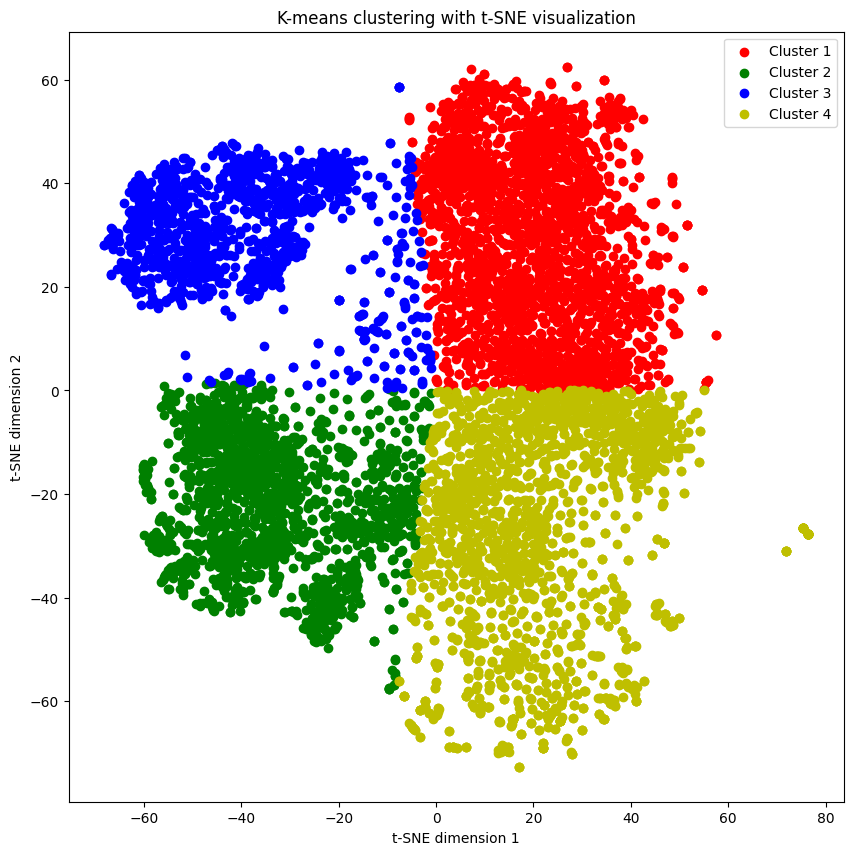

In [69]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y']

# Loop over each cluster and plot the points
for i in range(4):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df2_tsne.iloc[cluster_indices]['x'], 
               df2_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [70]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la t-SNE", nmi_kmoids_tsne)
print("ARI pour Kmedoids avec la t-SNE:", ari_kmoids_tsne)

NMI pour Kmedoids avec la t-SNE 0.6297694007246364
ARI pour Kmedoids avec la t-SNE: 0.536395929849297


On constate que les scores NMI et ARI pour les clusters de **kmedoids** appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

### 2.4. UMAP

In [71]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df2_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [72]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la UMAP:", nmi_kmoids_umap)
print("ARI pour Kmedoids avec la UMAP:", ari_kmoids_umap)

NMI pour Kmedoids avec la UMAP: 0.6001607413989369
ARI pour Kmedoids avec la UMAP: 0.4488354608941337


### 2.5. Autoencodeur 

In [73]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df2_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [74]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)
print("NMI pour le kmedoids avec le Autoencodeurs :", nmi_kmoids_auto)
print("ARI pour le kmedoids avec le Autoencodeurs :", ari_kmoids_auto)

NMI pour le kmedoids avec le Autoencodeurs : 0.4378086323213383
ARI pour le kmedoids avec le Autoencodeurs : 0.4124700959477292


## 3. Spherical  Kmeans

Nous allons maintenant refaire toutes les étapes avec l'algorithme de clustering Spherical KMeans, après avoir utilisé KMeans++ et KMedoids sur tous les espaces que nous avons explorés précédemment. Nous verrons si les résultats de clustering sont meilleurs ou pires avec cette méthode de clustering par rapport à KMeans et KMedoids.

### 3.1. Espace d'origine 

In [ ]:
!pip install coclust

In [ ]:
from coclust.clustering.spherical_kmeans import SphericalKmeans
# Set the number of clusters
n_clusters = 4
# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
df2_emb = df2_embeddings.iloc[:, :-1]
df2_emb = df2_emb.loc[(df2_emb != 0).any(axis=1)]
X = df2_emb.to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_



In [104]:
non_zero_indices = df2_emb.index
true_labels_nonzero = true_labels[non_zero_indices]

In [105]:
nmi_ksph_origine = normalized_mutual_info_score(true_labels_nonzero, spherical_kmeans_labels)
ari_ksph_origine = adjusted_rand_score(true_labels_nonzero, spherical_kmeans_labels)

print("NMI de SphericalKmeans dans l'espace d'origine :", nmi_ksph_origine)
print("ARI de SphericalKmeans dans l'espace d'origine:", ari_ksph_origine)

NMI de SphericalKmeans dans l'espace d'origine : 0.6121337100250638
ARI de SphericalKmeans dans l'espace d'origine: 0.4199791178461248


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids et Kmeans++.

 En effet, la méthode Spherical KMeans a une approche différente de la méthode KMedoids en termes de choix des centroids initiaux et de la distance utilisée pour regrouper les données. Spherical KMeans utilise une distance cosinus normalisée pour prendre en compte la similarité entre les données, ce qui est particulièrement utile pour des données textuelles. Par conséquent, il est plus adapté pour regrouper des données textuelles que la méthode KMedoids qui utilise une distance euclidienne.

### 3.2. PCA

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_pca = df2_pca.iloc[:, :-1].to_numpy()
#Fit the model on the data
spherical_kmeans.fit(X_pca)
#Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [78]:
nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI de SphericalKmeans avec la PCA :", nmi_ksph_pca)
print("ARI de SphericalKmeans avec la PCA:", ari_ksph_pca)

NMI de SphericalKmeans avec la PCA : 0.6255772775539097
ARI de SphericalKmeans avec la PCA: 0.44825591858038394


### 3.3. t-SNE 

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_tsne = df2_tsne.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X_tsne)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [80]:
nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la t-SNA:", nmi_ksph_tsne)
print("ARI de SphericalKmeans avec la t-SNA:", ari_ksph_tsne)

NMI de SphericalKmeans avec la t-SNA: 0.6297694007246363
ARI de SphericalKmeans avec la t-SNA: 0.536395929849297


### 3.4. UMAP

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_umap = df2_umap.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X_umap)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [82]:
nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la UMAP:", nmi_ksph_umap)
print("ARI de SphericalKmeans avec la UMAP:", ari_ksph_umap)

NMI de SphericalKmeans avec la UMAP: 0.6814548398697544
ARI de SphericalKmeans avec la UMAP: 0.4910105689253599


### 3.5. Autoencodeur

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_auto= df2_encoded.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X_auto)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [108]:
nmi_ksph_auto = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_auto = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la UMAP:", nmi_ksph_umap)
print("ARI de SphericalKmeans avec la UMAP:", ari_ksph_umap)

NMI de SphericalKmeans avec la UMAP: 0.6814548398697544
ARI de SphericalKmeans avec la UMAP: 0.4910105689253599


## 4. CAH 

Il peut être intéressant d'appliquer la classification hiérarchique ascendante (CAH) aux différents espaces de données que nous avons réduits, après avoir utilisé les méthodes de clustering k-means, k-medoids et spherical k-means. L'application de CAH peut permettre d'obtenir une vue plus globale des données en regroupant les différents clusters formés par les méthodes de clustering en sous-groupes plus larges, ce qui peut aider à mieux comprendre la structure des données.

Pour chaque espace (original et réduit par différentes méthodes), nous allons appliquer la CAH avec chacune des méthodes d'agrégation disponibles:

La méthode de liaison simple (single linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus proches.

La méthode de liaison complète (complete linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus éloignés.

La méthode de liaison moyenne (average linkage) : fusionne les clusters qui ont la plus petite distance moyenne entre tous leurs membres.

La méthode de Ward : minimise la variance totale des clusters fusionnés.

De cette façon, nous pourrons comparer les performances des différentes méthodes d'agrégation et trouver la méthode qui donne les meilleurs résultats pour chaque espace.

In [83]:
from sklearn.cluster import AgglomerativeClustering

### 4.1. Espace d'origine 

In [84]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.3545272236259668
NMI score: 0.5226208347298864
-------------------------------
Linkage method: complete
ARI score: -0.03612189216185503
NMI score: 0.0606962473493885
-------------------------------
Linkage method: average
ARI score: -0.007545050969903468
NMI score: 0.011119356929235932
-------------------------------
Linkage method: single
ARI score: -0.0004720484696262436
NMI score: 0.0006950104651721877
-------------------------------


### 4.2. PCA 

In [85]:
# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.38009111076804725
NMI score: 0.5485240034778178
-------------------------------
Linkage method: complete
ARI score: -0.04982133288615615
NMI score: 0.11726847620868065
-------------------------------
Linkage method: average
ARI score: -0.007655194305332407
NMI score: 0.011283475967787747
-------------------------------
Linkage method: single
ARI score: -0.0004720484696262436
NMI score: 0.0006950104651721877
-------------------------------


### 4.3. t-SNE

In [86]:
# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.6152810443179345
NMI score: 0.6977425841863714
-------------------------------
Linkage method: complete
ARI score: 0.2414434830208196
NMI score: 0.39557199811725546
-------------------------------
Linkage method: average
ARI score: 0.3443719452409132
NMI score: 0.5127289092365508
-------------------------------
Linkage method: single
ARI score: -0.007559294032240579
NMI score: 0.011107890946124766
-------------------------------


### 4.4. UMAP 

In [87]:
# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.40238946201216946
NMI score: 0.5802554336015542
-------------------------------
Linkage method: complete
ARI score: -0.01042234991219184
NMI score: 0.015083886940142696
-------------------------------
Linkage method: average
ARI score: -0.007810130098201973
NMI score: 0.011414335478672903
-------------------------------
Linkage method: single
ARI score: -0.00861061087452732
NMI score: 0.012536916245750797
-------------------------------


### 4.5. Autoencodeur

In [90]:
# Set the number of clusters
n_clusters = 4

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df2_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.3480903968446631
NMI score: 0.5178925562362758
-------------------------------
Linkage method: complete
ARI score: -0.004301129956874092
NMI score: 0.006306249914809592
-------------------------------
Linkage method: average
ARI score: -0.0004720484696262436
NMI score: 0.0006950104651721877
-------------------------------
Linkage method: single
ARI score: -0.0004720484696262436
NMI score: 0.0006950104651721877
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original ainsi que dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, malgré l'utilisation de différentes méthodes de réduction de dimension et d'agrégation hiérarchique, les résultats obtenus ne sont pas satisfaisants.

La méthode de réduction qui a données les résultats les plus élevé est t-SNE et UMAP  mais les scores d'ARI et de NMI obtenus restent faibles. Cette situation peut être expliquée par la complexité et le mélange des données, qui ont rendu difficile la séparation des clusters dans l'espace.

In [91]:
#récuperer les meilleures scores pour chaque espace.
ari_cah_origine= 0.3545272236259668 
nmi_cah_origine=0.5226208347298864
ari_cah_pca=0.38009111076804725
nmi_cah_pca=0.5485240034778178 
ari_cah_tsne=0.6152810443179345
nmi_cah_tsne= 0.6977425841863714
ari_cah_umap=0.40238946201216946
nmi_cah_umap=0.5802554336015542
ari_cah_auto=0.3480903968446631
nmi_cah_auto=0.5178925562362758

## Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [109]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['origine', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method        CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                       
auto     0.348090  0.412470  0.154111        0.434241  0.517893  0.437809   
origine  0.354527  0.453717  0.330990        0.419979  0.522621  0.597875   
pca      0.380091  0.365499  0.330806        0.448256  0.548524  0.504333   
tsne     0.615281  0.536396  0.539890        0.536396  0.697743  0.629769   
umap     0.402389  0.448835  0.364628        0.491011  0.580255  0.600161   

                                   
method   KMeans++ KMeansSpherical  
space                              
auto     0.427425        0.534398  
origine  0.481082        0.612134  
pca      0.480605        0.625577  
tsne     0.666269        0.629769  
umap     0.569599        0.681455

<Figure size 1000x600 with 0 Axes>

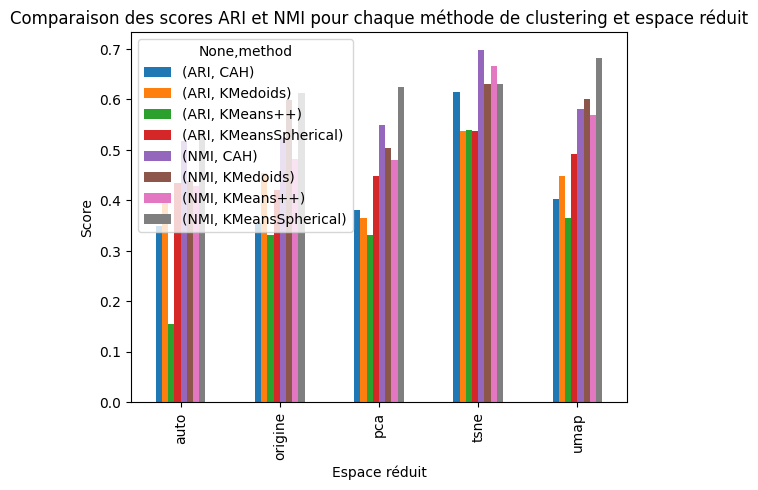

In [110]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode CAH a donné les meilleurs résultats en termes de scores NMI dans l'espace réduit t-SNE et Spherical Kmeans a donné les meilleurs résultat en terme de score ARI dans l'espace réduit UMAP.

### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode CAH avec la méthode de liaison ward dans l'espace T-SNE, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

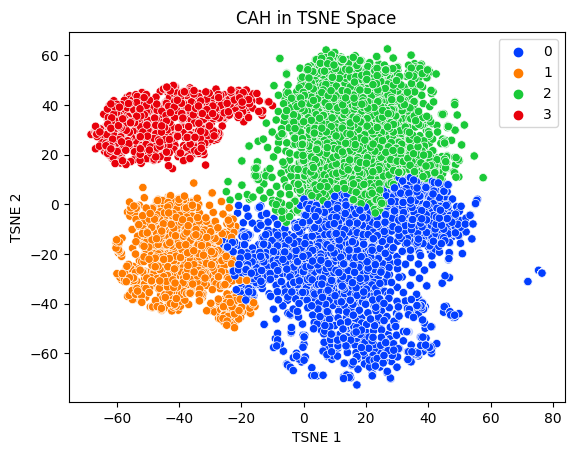

In [112]:
import seaborn as sns

# Fit CAH on t-SNE embeddings

agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Fit the model on the data
agglomerative.fit(df2_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
agglomerative_labels = agglomerative.labels_


# Convert DataFrame to NumPy array
X = df2_tsne.iloc[:, :-1].to_numpy()

# Fit the model on the data
agglomerative.fit(X)

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df2_tsne.iloc[:, 0], y=df2_tsne.iloc[:, 1], hue=agglomerative_labels, palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('CAH in TSNE Space')

# Show the plot
plt.show()

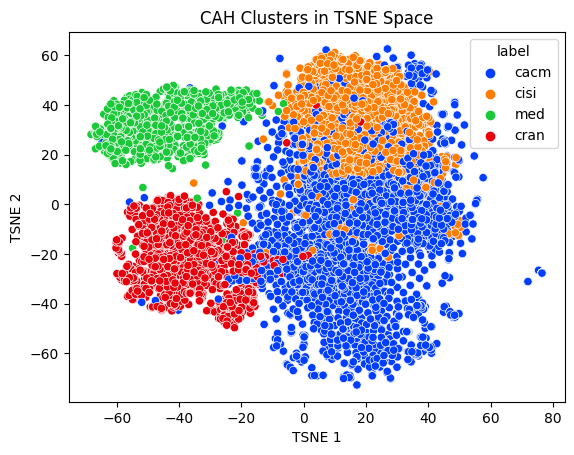

In [115]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df2_tsne.iloc[:, 0], y=df2_tsne.iloc[:, 1], hue=df2_tsne['label'], palette='bright')

# Add axis labels and a title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('CAH Clusters in TSNE Space')

# Show the plot
plt.show()

En examinant les deux nuages de points, il semble que les données soient mélangées et dispersées, ce qui rend difficile l'identification de groupes distincts. Cela peut expliquer pourquoi les résultats des clusters ne sont pas significatifs et peuvent être interprétés avec prudence.\
En effet, la complexité et la mixité des données dans ce dataset ont rendu difficile la détection de structures claires et significatives dans les clusters. Cela a également été reflété par les faibles scores ARI et NMI obtenus pour la plupart des méthodes de clustering testées. Dans ce contexte, il est important de noter que la précision (accuracy) est une mesure qui est basée sur la classification correcte des données, ce qui nécessite la présence de clusters clairement définis et séparés. Comme cela n'a pas été le cas ici, il est juste de dire que la précision ne serait pas une mesure pertinente pour évaluer les performances des différentes méthodes de clustering pour ce dataset.

### Nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

In [116]:
import warnings
warnings.filterwarnings("ignore")

### 1. Elbow method

1. Espace d'origine 

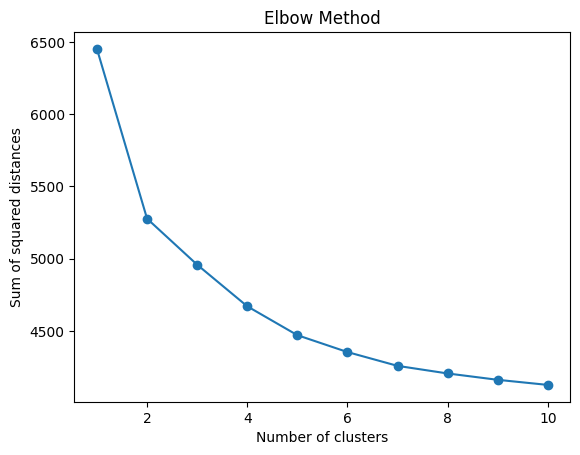

In [117]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

2. PCA

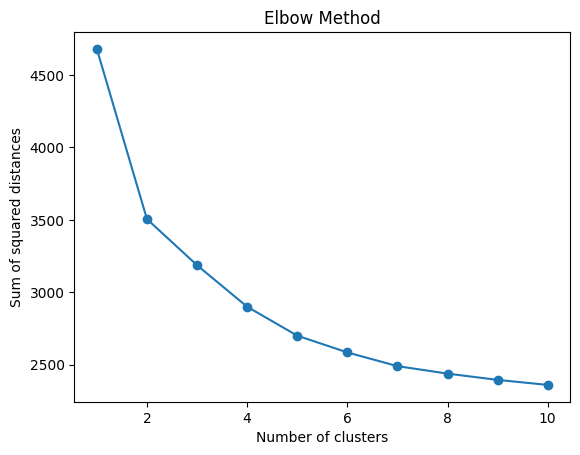

In [118]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

3. t-SNE 

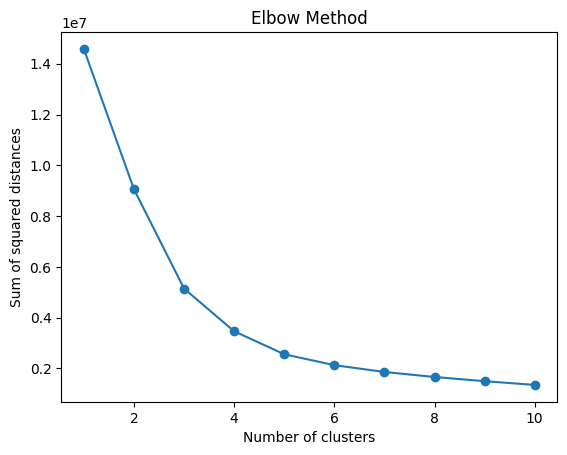

In [119]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

4. UMAP

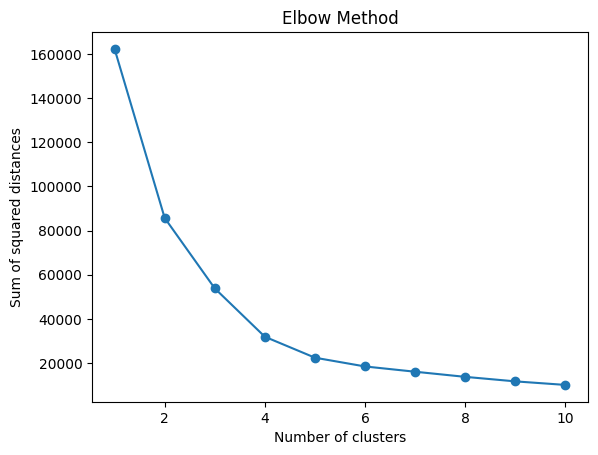

In [120]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

5. Autoencodeur 

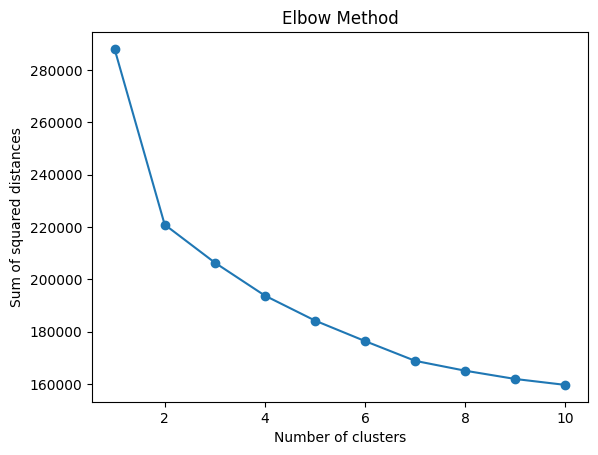

In [121]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df2_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

D'après les résultats de l'analyse avec la méthode Elbow, il a été déterminé que le nombre de clusters optimal pour les données de notre ensemble de données était de quatre. Ce résultat a été observé sur l'ensemble des espaces de projection, ce qui renforce la confiance dans la validité de ce nombre optimal de clusters. Ainsi, nous pouvons conclure que le meilleur partitionnement de notre ensemble de données en clusters doit être effectué en utilisant quatre clusters.

### 2. Silhouette method 

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

In [122]:
from sklearn.metrics import silhouette_score

1. Espace d'origine 

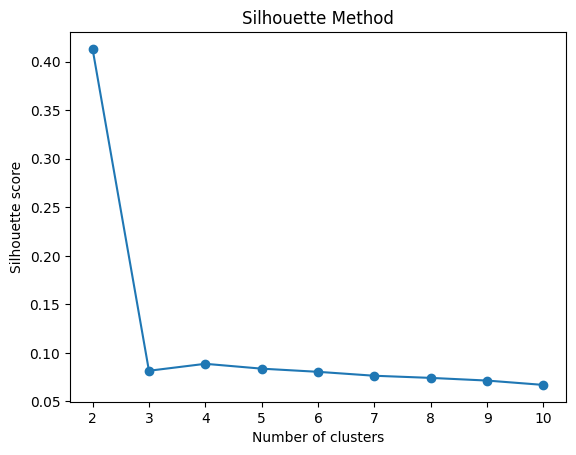

In [123]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df2_embeddings.iloc[:, :-1])
    silhouette_avg = silhouette_score(df2_embeddings.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

2. PCA 

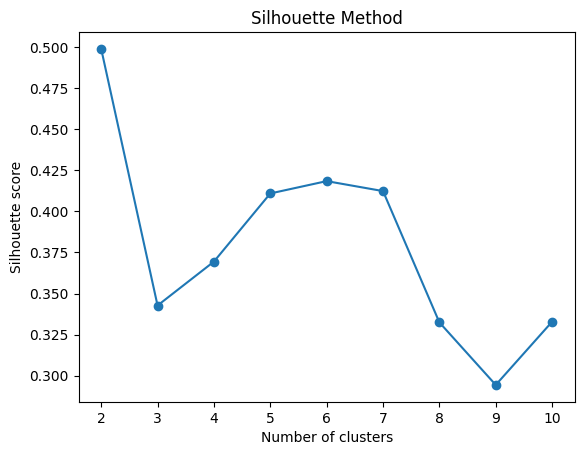

In [124]:
from sklearn.metrics import silhouette_score

# Convert DataFrame to NumPy array
X_pca = df2_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

3. t-SNE 

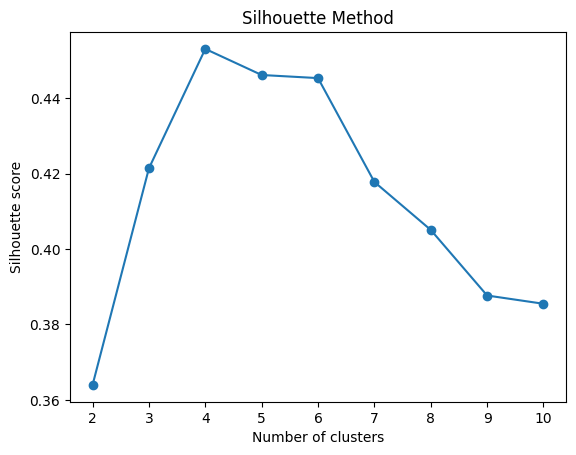

In [125]:
# Convert DataFrame to NumPy array
X_tsne = df2_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

4. UMAP

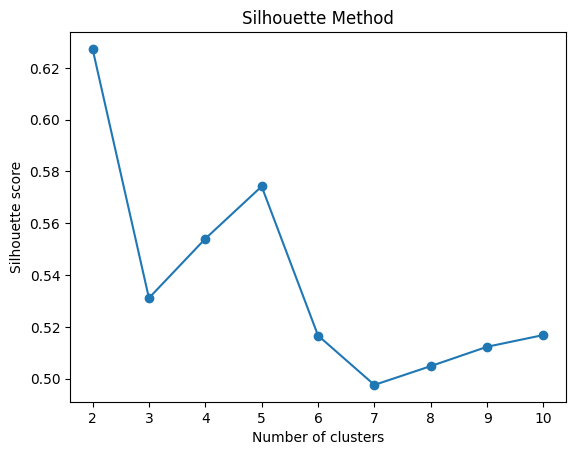

In [126]:
# Convert DataFrame to NumPy array
X_umap = df2_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

5. Autoencodeur 

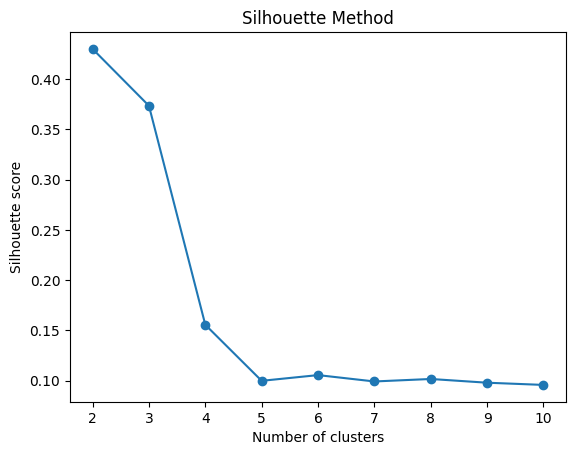

In [127]:
# Convert DataFrame to NumPy array
X_auto = df2_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_auto)
    silhouette_avg = silhouette_score(X_auto, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

En utilisant la méthode de Silhouette, nous avons également constaté que le nombre optimal de clusters pour notre ensemble de données est de quatre même si le score de silhoute  est faible à 4 mais il reste plus élevé que les autre nombre de cluster. 

# Partie 2 : Approche jointe/simultanée

## 1. Reduced Kmeans

Nous avons utilisé la bibliothèque R "clustrd" [2] pour appliquer des méthodes combinant simultanément les méthodes de réduction de dimension et de clustering. Pour ce faire, nous avons écrit un script R qui nous donne les labels de clusters pour chaque dataframe et les enregistre dans un fichier txt. Nous utiliserons ensuite Python pour étudier les performances.

Les fonctions clusmca() et cluspca() sont toutes deux des fonctions de la librairie R clustrd qui combinent des méthodes de réduction de dimension et de clustering pour effectuer l'analyse de cluster.

La différence entre les deux fonctions est le type de méthode de réduction de dimension qu'elles utilisent. clusmca() utilise l'analyse en composantes multiples (MCA) pour réduire la dimension des données, tandis que cluspca() utilise l'analyse en composantes principales (PCA).

L'analyse en composantes multiples est une méthode de réduction de dimension qui est utilisée pour les données catégorielles et nominales, tandis que l'analyse en composantes principales est utilisée pour les données quantitatives et continues.

Comme notre jeu de données est purement numérique (embedded data), il n'est pas nécessaire d'utiliser clusmca() car cette fonction est conçue pour les données catégorielles et nominales. Nous allons plutôt utiliser cluspca() qui utilise l'analyse en composantes principales (PCA) pour réduire la dimension des données.

In [ ]:
### Code R ###
#install.packages("clustrd")
#library(clustrd)
#df1_embeddings <- read.csv("df1_embeddings.csv")
#nbclus=3
#ndim=50
#outRKM = cluspca(df1_embeddings[, 1:(ncol(df1_embeddings)-1)]
#, nbclus, ndim, method = "RKM", rotation = "varimax", scale = FALSE, nstart = 10)
#
#
#true_labels = df1_embeddings[101]
#
## Obtenir les étiquettes de cluster à partir de la sortie de cluspca
#
#cluster_labels <- outRKM$cluster
#
#cluster_labels-1
#
#write.table(cluster_labels-1, "cluster_labels.txt", row.names = FALSE, col.names = FALSE)

In [129]:
with open("w2v_R/cluster_labels2.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['0', '0', '1', '1', '0', '0', '2', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '2', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '2', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '3', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '2', '0', '0', '1', '0', '2', '0', '2', '0', '1', '0', '0', '0', '0', '1', '2', '1', '2', '1', '1', '1', '1', '2', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '3', '0', '1', '0', '0', '0', '0', '1', '2', '0', '0', '0', '2', '2', '0', '0', '2', '1', '2', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '2', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '2', '1', '0', '3', '3', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0',

In [130]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

NMI: 0.47962936559715585
ARI: 0.3223055202324576


En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats sont presque les mêmes avec une légére augmentation en utilisant la réduction PCA puis Kmeans. En effet, cluspca utilise la PCA pour réduire la dimensionnalité de la donnée numérique, puis applique une méthode de clustering sur les composantes principales pour trouver les groupes similaires. Pour ce cas les résultats des deux approches ne sont pas différant donc l'application de l'approche jointe ou approche tandem n'affecte pas la qualité du modèle sauf que l'approche jointe est plus facile et plus rapide à appliquer

## Deep Kmeans 

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier dkm.py ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py
Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d CLASSIC4 -p`**

On a eu un ARI = 0.28, un NMI = 0,42 et une accuracy de 0.49

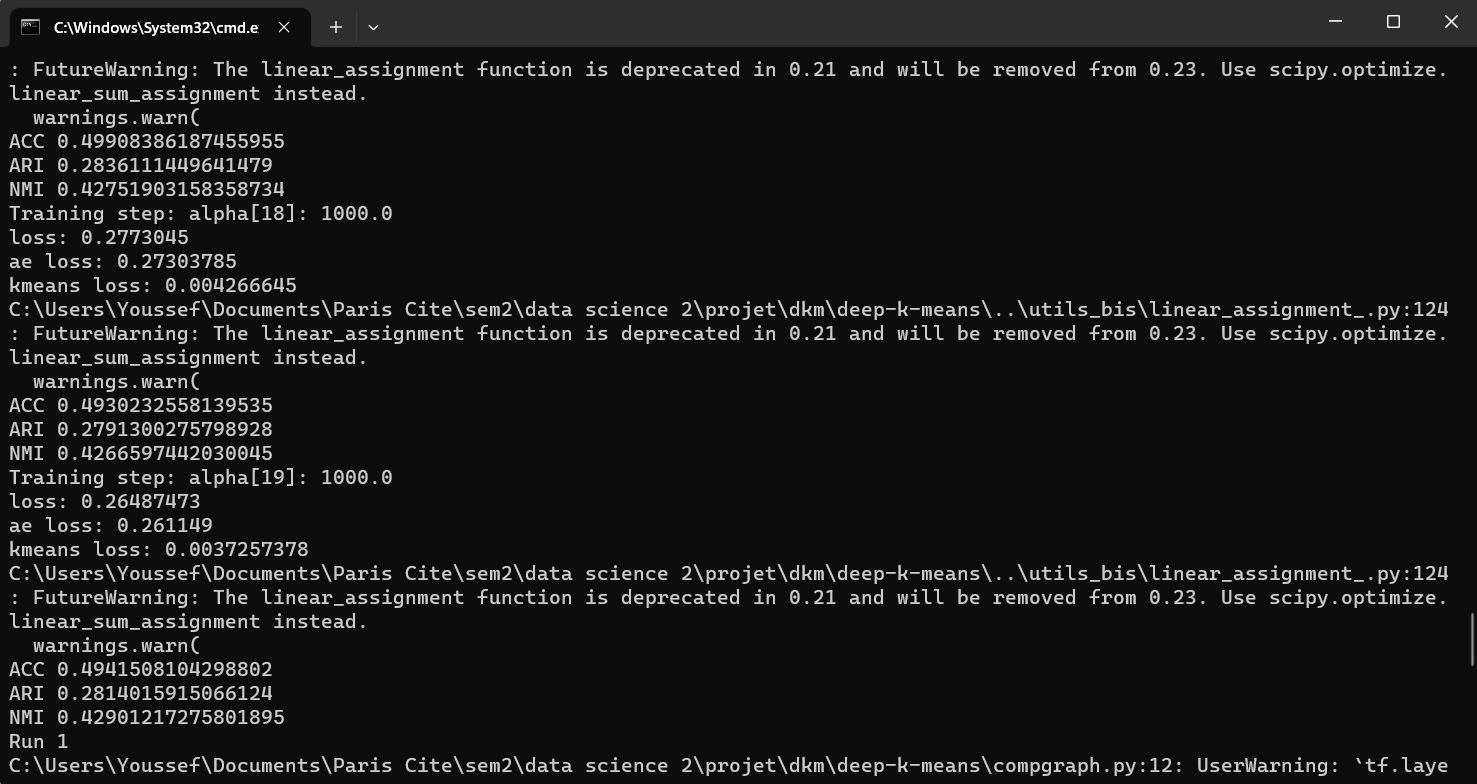

Les résultats obtenus avec cette méthode sont aussi non satisfaisants.

Suite à toutes les méthodes de clustering que nous avons testées, nous pouvons conclure que les données ne sont pas adaptées pour un modèle de clustering. Ceci est dû à la nature complexe et mélangée des données. De plus, les différents espaces réduits que nous avons testés n'ont pas permis de capturer des structures de cluster significatives. En conséquence, toute tentative de prédiction de la classe des données avec un modèle de clustering serait imprécise et peu fiable.

# BBC DataSet


---



---





# Partie 1 : Approche Tandem

##1. Kmeans++



### 1.1 Espace d'origine 

In [131]:
from sklearn.cluster import KMeans
# Définir le nombre de clusters
num_clusters = 5
# Créer l'objet KMeans avec l'initialisation K-means++
kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
# Appliquer le K-means++ sur les données d'embedding
kmeans_pp.fit(df3_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_pp = kmeans_pp.labels_

In [132]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df3['label']
# Calculer la NMI
nmi_kpp_origine = normalized_mutual_info_score(true_labels, labels_pp)
# Calculer l'ARI
ari_kpp_origine = adjusted_rand_score(true_labels, labels_pp)
print("NMI de Kmeans++ dans l'espace d'origine  : " , nmi_kpp_origine )
print("ARI de Kmeans++ dans l'espace d'origine  : : " , ari_kpp_origine )

NMI de Kmeans++ dans l'espace d'origine  :  0.7586980964951588
ARI de Kmeans++ dans l'espace d'origine  : :  0.758056670888522


### 1.2. PCA 

Elbow method:

L'Elbow method est une technique largement utilisée pour déterminer le nombre optimal de composantes principales à conserver lors de l'analyse en composantes principales (PCA). Le but de cette méthode est de trouver le point où l'ajout d'une nouvelle composante principale ne contribue pas significativement à l'explication de la variance des données. Le point d'inflexion est appelé le coude (en anglais elbow), car la courbe ressemble à un coude à ce point.

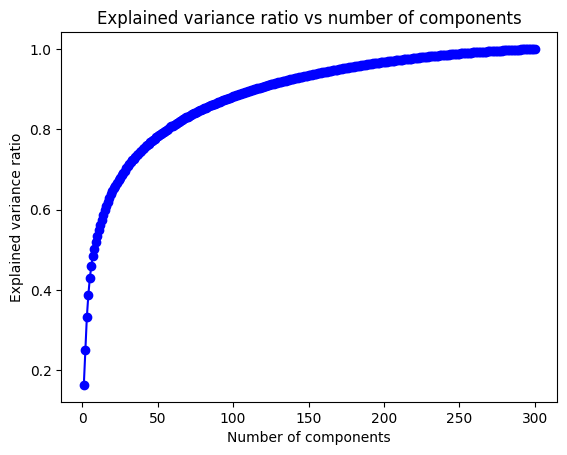

In [133]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit PCA on embeddings
pca.fit(df3_embeddings.iloc[:, :-1])

# Calculate cumulative sum of explained variance ratios
cumsum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio vs the number of components
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio vs number of components')
plt.show()

Après avoir analysé la méthode du coude, nous avons choisi visuellement de conserver 25 composantes qui expliquent plus de 70% de la variance. Au-delà de 25, l'augmentation de la variance expliquée par les composantes devient très faible à chaque itération, c'est pourquoi nous avons décidé de nous arrêter à 25.

In [134]:
from sklearn.decomposition import PCA

# Define the number of components to keep
n_components = 25

# Initialize PCA object
pca = PCA(n_components=n_components)

# Fit PCA on embeddings
pca.fit(df3_embeddings.iloc[:, :-1])

# Apply dimensionality reduction
df3_pca = pd.DataFrame(pca.transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_pca['label'] = df3['label']

# Rename columns
df3_pca.columns = ['PC'+str(i+1) for i in range(n_components)] + ['label']

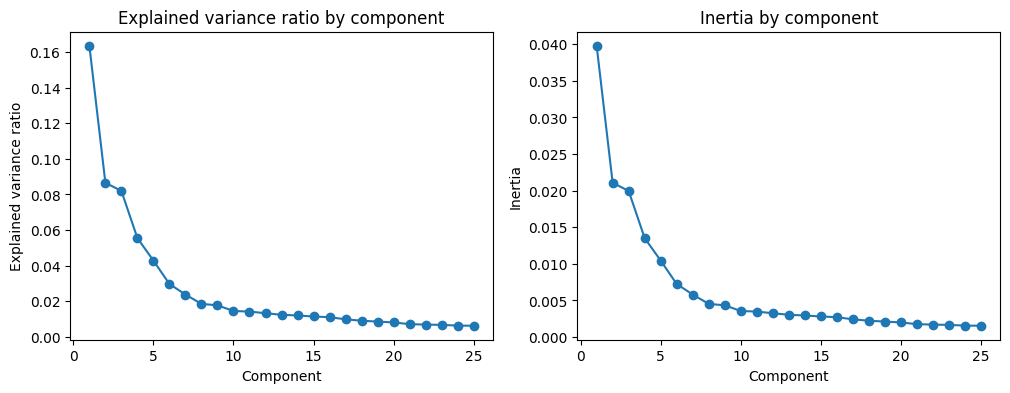

In [135]:
# Compute explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Compute inertia of each component
inertia = pca.explained_variance_

# Plot explained variance ratio and inertia
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axs[0].plot(np.arange(1, n_components+1), explained_var_ratio, '-o')
axs[0].set_xlabel('Component')
axs[0].set_ylabel('Explained variance ratio')
axs[0].set_title('Explained variance ratio by component')
axs[1].plot(np.arange(1, n_components+1), inertia, '-o')
axs[1].set_xlabel('Component')
axs[1].set_ylabel('Inertia')
axs[1].set_title('Inertia by component')
plt.show()

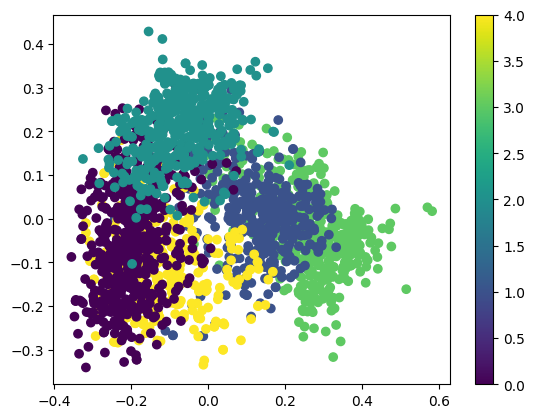

In [136]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
le = LabelEncoder()

# Fit and transform the label column to numerical values
df3_pca['label'] = le.fit_transform(df3_pca['label'])

# Plot scatter plot
plt.scatter(df3_pca['PC1'], df3_pca['PC2'], c=df3_pca['label'], cmap='viridis')
plt.colorbar()
plt.show()

Après avoir réalisé l'ACP avec 25 composantes, nous avons tracé le nuage de points sur les deux premiers axes. Nous pouvons distinguer les quatre groupes.

In [137]:
# Fit the model on the data
kmeans_pp.fit(df3_pca.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

# Get the centroids of each cluster
centroids = kmeans_pp.cluster_centers_

In [138]:
nmi_kpp_pca = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_pca = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kpp_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kpp_pca)

NMI pour kmeans++ avec la PCA: 0.7584131611580247
ARI pour kmeans++ avec la PCA : 0.7589912049779641


### 1.3.  t-SNE

Le t-SNE est une méthode de réduction de dimensionnalité qui diffère de la PCA en ce qu'elle vise à conserver les structures de proximité non linéaires dans les données. Cette méthode est souvent utilisée pour la visualisation de données en deux ou trois dimensions, car elle est particulièrement utile pour la détection des relations non linéaires entre les points de données. En comparaison avec la PCA, le t-SNE a une complexité de calcul plus élevée et est plus lent à exécuter, mais peut être plus utile dans certains scénarios où la relation entre les données est non linéaire. Nous allons donc essayer de réduire les dimensions de nos données avec t-SNE pour voir si cela peut améliorer notre clustering.

In [139]:
from sklearn.manifold import TSNE
# Initialize t-SNE object
tsne = TSNE(n_components=2)
# Fit and transform t-SNE on embeddings
df3_tsne = pd.DataFrame(tsne.fit_transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_tsne['label'] = df3['label']

# Rename columns
df3_tsne.columns = ['x', 'y', 'label']

In [140]:
df3_tsne

x          y     label
0     36.348431  25.011492     sport
1     53.970776  10.732162     sport
2     46.148979  18.578032     sport
3     49.923141   1.719606     sport
4     30.428619   9.768041     sport
...         ...        ...       ...
2220   1.721923  -2.105774  politics
2221 -22.078934  19.081467  politics
2222  -4.715062   8.881140  politics
2223   6.200239   8.308151  politics
2224 -12.273693  15.782555  politics

[2225 rows x 3 columns]

In [141]:
# Fit KMeans on t-SNE embeddings
kmeans_pp.fit(df3_tsne.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

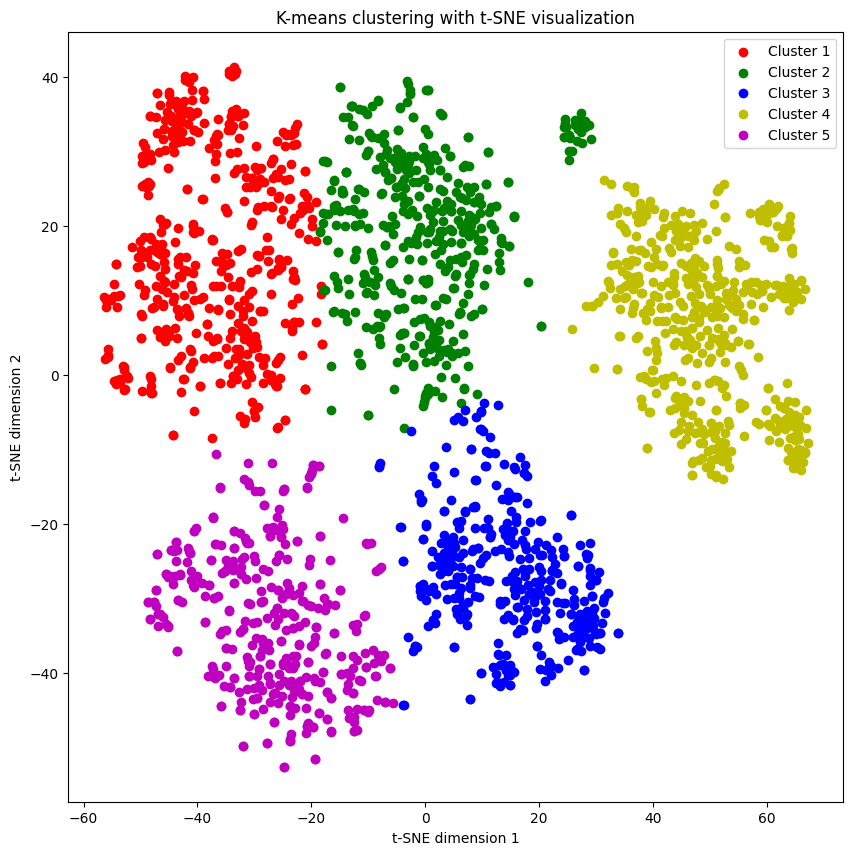

In [142]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y','m']

# Loop over each cluster and plot the points
for i in range(5):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmeans_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df3_tsne.iloc[cluster_indices]['x'], 
               df3_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

En observant le nuage de points généré à partir de l'application de l'algorithme k-means++ sur les données réduites par t-SNE, on peut clairement distinguer les cinq clusters. Cela montre que t-SNE peut être une amélioration par rapport à PCA pour la réduction de dimension, car elle permet une meilleure séparation des clusters dans l'espace réduit. Cependant, le choix du nombre optimal de composantes reste un défi pour t-SNE, car il dépend des données et peut nécessiter des tests empiriques.

In [143]:
nmi_kpp_tsne = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_tsne = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la t-SNE", nmi_kpp_tsne)
print("ARI pour Kmeans++ avec la t-SNE:", ari_kpp_tsne)

NMI pour Kmeans++ avec la t-SNE 0.8335064077006049
ARI pour Kmeans++ avec la t-SNE: 0.8577787389294449


On constate que les scores NMI et ARI pour les clusters de k-means++ appliqués sur les données t-SNE sont meilleurs que ceux obtenus avec la PCA ou les données originales. Cela indique que la réduction de dimensionnalité avec t-SNE a permis de mieux capturer les similarités et les différences entre les points, conduisant à une meilleure partition des données en clusters.

### 1.4. UMAP

UMAP (Uniform Manifold Approximation and Projection) est une méthode de réduction de dimensionnalité non linéaire qui vise à préserver la structure globale des données. Contrairement aux méthodes de réduction de dimensionnalité linéaires telles que PCA et t-SNE, UMAP utilise une approche probabiliste basée sur la théorie de l'information pour créer une représentation en deux ou trois dimensions des données. UMAP est particulièrement utile pour les données complexes et non linéaires, et peut être utilisé pour la visualisation, la clustering, la détection d'anomalies et d'autres applications d'apprentissage automatique. Nous allons donc l'utiliser pour voir si cette méthode permet d'obtenir des résultats encore meilleurs que ceux obtenus avec PCA et t-SNE.

In [ ]:
! pip install umap-learn 

In [144]:
import umap

# Define the number of components to keep
n_components = 25
# Initialize UMAP object
umap_obj = umap.UMAP(n_components=n_components)

# Fit and transform UMAP on embeddings
df3_umap = pd.DataFrame(umap_obj.fit_transform(df3_embeddings.iloc[:, :-1]))

# Add label column to the new dataframe
df3_umap['label'] = df3['label']

# Rename columns
df3_umap.columns = ['UMAP'+str(i+1) for i in range(n_components)] + ['label']

In [145]:
# Fit KMeans on Umap embeddings
kmeans_pp.fit(df3_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

In [146]:
nmi_kpp_umap = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_umap = adjusted_rand_score(true_labels, kmeans_labels)

print("NMI pour Kmeans++ avec la UMAP:", nmi_kpp_umap)
print("ARI pour Kmeans++ avec la UMAP:", ari_kpp_umap)

NMI pour Kmeans++ avec la UMAP: 0.8619411587955151
ARI pour Kmeans++ avec la UMAP: 0.8888050078005258


### 1.5. Autoencodeurs

Après avoir essayé les méthodes traditionnelles de réduction de dimension comme l'ACP, le t-SNE et l'UMAP, il peut être intéressant d'essayer l'autoencodeur pour réduire la dimensionnalité de nos données. Contrairement aux méthodes traditionnelles qui se basent sur des projections linéaires ou non linéaires, l'autoencodeur utilise une architecture de réseau de neurones qui peut capturer des relations non linéaires et des interactions complexes entre les variables. Cela peut donner lieu à un espace de représentation plus discriminant et peut-être mieux adapté pour la tâche de clustering. De plus, les autoencodeurs ont la capacité d'apprendre des représentations latentes des données, ce qui peut nous aider à comprendre les caractéristiques sous-jacentes des données qui ont un impact sur la similarité entre les observations.

In [147]:
from keras.models import Model
from keras.layers import Input, Dense
# Normalize data
df3_norm = (df3_embeddings.iloc[:, :-1] - df3_embeddings.iloc[:, :-1].mean()) / df3_embeddings.iloc[:, :-1].std()
# Define input shape
input_shape = df3_norm.shape[1]
# Define encoding dimension
encoding_dim = 25
# Define input layer
input_layer = Input(shape=(input_shape,))
# Define encoding layer
encoding_layer = Dense(encoding_dim, activation='relu')(input_layer)
# Define decoding layer
decoding_layer = Dense(input_shape, activation='linear')(encoding_layer)
# Define autoencoder model
autoencoder = Model(input_layer, decoding_layer)
# Compile autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')
# Train autoencoder model
autoencoder.fit(df3_norm, df3_norm, epochs=100, batch_size=32, verbose=0)
# Define encoder model
encoder = Model(input_layer, encoding_layer)
# Encode data
df3_encoded = pd.DataFrame(encoder.predict(df3_norm))
# Add label column to the new dataframe
df3_encoded['label'] = df3['label']
# Rename columns
df3_encoded.columns = ['AE'+str(i+1) for i in range(encoding_dim)] + ['label']

70/70 [==============================] - 0s 1ms/step


In [148]:
# Fit KMeans on this embeddings
kmeans_pp.fit(df3_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmeans_labels = kmeans_pp.labels_

In [149]:
nmi_kpp_auto = normalized_mutual_info_score(true_labels, kmeans_labels)
ari_kpp_auto = adjusted_rand_score(true_labels, kmeans_labels)
print("NMI pour le Kmeans++ avec le Autoencodeurs :", nmi_kpp_auto)
print("ARI pour le Kmeans++ avec le Autoencodeurs :", ari_kpp_auto)

NMI pour le Kmeans++ avec le Autoencodeurs : 0.7434325456159346
ARI pour le Kmeans++ avec le Autoencodeurs : 0.7172690775607435


## 2. Kmedoids

### 2.1. Espace d'origine 

In [ ]:
!pip install scikit-learn-extra

In [150]:
from sklearn_extra.cluster import KMedoids
# Définir le nombre de clusters
num_clusters = 5
# Créer l'objet KMeans avec l'initialisation K-means++
kmedoids = KMedoids(n_clusters=num_clusters, metric='cosine', init='random')
# Appliquer l'algorithme aux données
kmedoids.fit(df3_embeddings.iloc[:, :-1])
# Obtenir les labels de clusters pour chaque article
labels_kmedoids = kmedoids.labels_

In [151]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, adjusted_rand_score
# Obtenir les labels de vérité terrain à partir de la colonne label
true_labels = df3['label']
# Calculer la NMI
nmi_kmoids_origine = normalized_mutual_info_score(true_labels, labels_kmedoids)
# Calculer l'ARI
ari_kmoids_origine = adjusted_rand_score(true_labels, labels_kmedoids)
print("NMI de Kmedoids dans l'espace d'origine  : " , nmi_kmoids_origine )
print("ARI de Kmedoids dans l'espace d'origine  : : " , ari_kmoids_origine )

NMI de Kmedoids dans l'espace d'origine  :  0.6238925375652777
ARI de Kmedoids dans l'espace d'origine  : :  0.5578284387090244


### 2.2. PCA 

comme nous avons préciser précédament nous allons utiliser 50 composantes pour la PCA

In [152]:
# Fit the model on the data
kmedoids.fit(df3_pca.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_
# Get the centroids of each cluster
centroids = kmedoids.cluster_centers_

In [153]:
nmi_kmoids_pca = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_pca = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour kmeans++ avec la PCA:", nmi_kmoids_pca)
print("ARI pour kmeans++ avec la PCA :", ari_kmoids_pca)

NMI pour kmeans++ avec la PCA: 0.7607799871704838
ARI pour kmeans++ avec la PCA : 0.7858664719235321


### 2.3. t-SNE 

In [154]:
# Fit KMeans on t-SNE embeddings
kmedoids.fit(df3_tsne.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

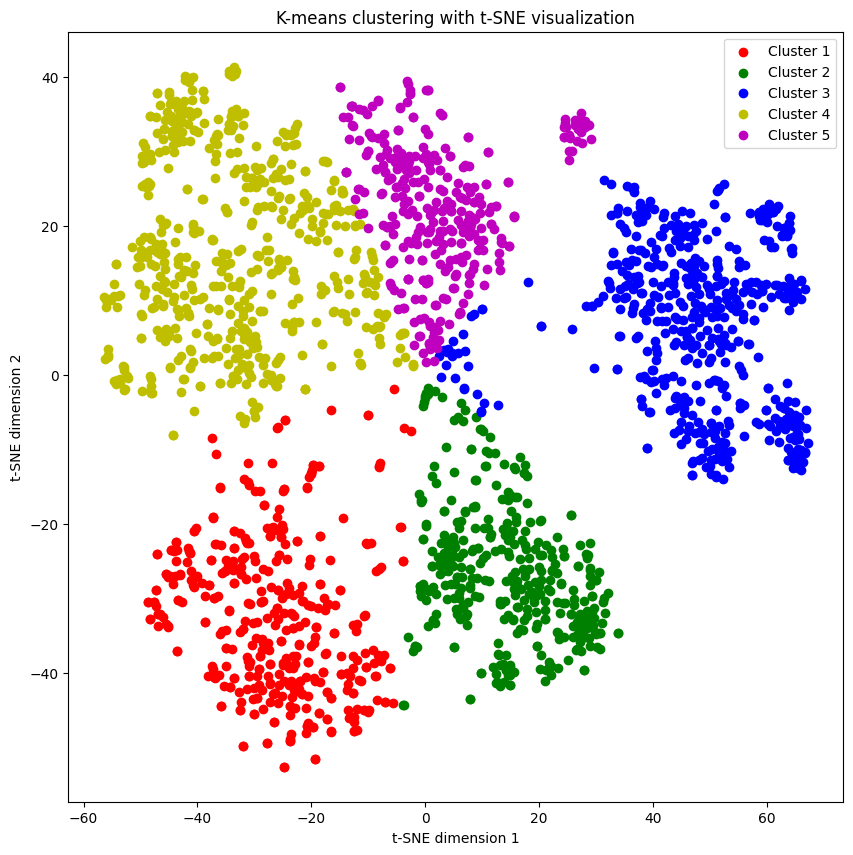

In [155]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,10))

# Define colors for each cluster
colors = ['r', 'g', 'b','y','m']

# Loop over each cluster and plot the points
for i in range(5):
    # Get indices of points belonging to cluster i
    cluster_indices = np.where(kmedoids_labels == i)
    # Plot the points with the corresponding color and label
    ax.scatter(df3_tsne.iloc[cluster_indices]['x'], 
               df3_tsne.iloc[cluster_indices]['y'], 
               c=colors[i], label='Cluster '+str(i+1))

# Set the title and labels for the axes
ax.set_title('K-means clustering with t-SNE visualization')
ax.set_xlabel('t-SNE dimension 1')
ax.set_ylabel('t-SNE dimension 2')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [156]:
nmi_kmoids_tsne = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_tsne = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la t-SNE", nmi_kmoids_tsne)
print("ARI pour Kmedoids avec la t-SNE:", ari_kmoids_tsne)

NMI pour Kmedoids avec la t-SNE 0.766228178041105
ARI pour Kmedoids avec la t-SNE: 0.7778479870928963


### 2.4. UMAP

In [157]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df3_umap.iloc[:, :-1])

# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [158]:
nmi_kmoids_umap = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_umap = adjusted_rand_score(true_labels, kmedoids_labels)

print("NMI pour Kmedoids avec la UMAP:", nmi_kmoids_umap)
print("ARI pour Kmedoids avec la UMAP:", ari_kmoids_umap)

NMI pour Kmedoids avec la UMAP: 0.7380935139939409
ARI pour Kmedoids avec la UMAP: 0.6725102870779527


### 2.5. Autoencodeur 

In [159]:
# Fit KMeans on Umap embeddings
kmedoids.fit(df3_encoded.iloc[:, :-1])
# Get the cluster labels for each data point
kmedoids_labels = kmedoids.labels_

In [160]:
nmi_kmoids_auto = normalized_mutual_info_score(true_labels, kmedoids_labels)
ari_kmoids_auto = adjusted_rand_score(true_labels, kmedoids_labels)
print("NMI pour le kmedoids avec le Autoencodeurs :", nmi_kmoids_auto)
print("ARI pour le kmedoids avec le Autoencodeurs :", ari_kmoids_auto)

NMI pour le kmedoids avec le Autoencodeurs : 0.4264830147119541
ARI pour le kmedoids avec le Autoencodeurs : 0.3744183552190424


## 3. Spherical  Kmeans

Nous allons maintenant refaire toutes les étapes avec l'algorithme de clustering Spherical KMeans, après avoir utilisé KMeans++ et KMedoids sur tous les espaces que nous avons explorés précédemment. Nous verrons si les résultats de clustering sont meilleurs ou pires avec cette méthode de clustering par rapport à KMeans et KMedoids.

### 3.1. Espace d'origine 

In [ ]:
!pip install coclust

In [ ]:
from coclust.clustering.spherical_kmeans import SphericalKmeans
# Set the number of clusters
n_clusters = 5
# Initialize the SphericalKmeans model with k-means++ initialization
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X = df3_embeddings.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_



In [162]:
nmi_ksph_origine = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_origine = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI de SphericalKmeans dans l'espace d'origine :", nmi_ksph_origine)
print("ARI de SphericalKmeans dans l'espace d'origine:", ari_ksph_origine)

NMI de SphericalKmeans dans l'espace d'origine : 0.7628731327019697
ARI de SphericalKmeans dans l'espace d'origine: 0.7663378208882753


En utilisant Spherical KMeans sur l'espace original des données, nous avons obtenu des résultats supérieurs en termes d'ARI et NMI par rapport à la méthode KMedoids et Kmeans++.

 En effet, la méthode Spherical KMeans a une approche différente de la méthode KMedoids en termes de choix des centroids initiaux et de la distance utilisée pour regrouper les données. Spherical KMeans utilise une distance cosinus normalisée pour prendre en compte la similarité entre les données, ce qui est particulièrement utile pour des données textuelles. Par conséquent, il est plus adapté pour regrouper des données textuelles que la méthode KMedoids qui utilise une distance euclidienne.

### 3.2. PCA

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_pca = df3_pca.iloc[:, :-1].to_numpy()
#Fit the model on the data
spherical_kmeans.fit(X_pca)
#Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [164]:
nmi_ksph_pca = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_pca = adjusted_rand_score(true_labels, spherical_kmeans_labels)

print("NMI de SphericalKmeans avec la PCA :", nmi_ksph_pca)
print("ARI de SphericalKmeans avec la PCA:", ari_ksph_pca)

NMI de SphericalKmeans avec la PCA : 0.7628609642978407
ARI de SphericalKmeans avec la PCA: 0.7879428726757056


### 3.3. t-SNE 

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_tsne = df3_tsne.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X_tsne)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [166]:
nmi_ksph_tsne = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_tsne = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la t-SNA:", nmi_ksph_tsne)
print("ARI de SphericalKmeans avec la t-SNA:", ari_ksph_tsne)

NMI de SphericalKmeans avec la t-SNA: 0.7657886145127436
ARI de SphericalKmeans avec la t-SNA: 0.7770719366591718


### 3.4. UMAP

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_umap = df3_umap.iloc[:, :-1].to_numpy()
# Fit the model on the data
spherical_kmeans.fit(X_umap)
# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [168]:
nmi_ksph_umap = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_umap = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la UMAP:", nmi_ksph_umap)
print("ARI de SphericalKmeans avec la UMAP:", ari_ksph_umap)

NMI de SphericalKmeans avec la UMAP: 0.7190739907837501
ARI de SphericalKmeans avec la UMAP: 0.5954973368913193


### 3.5. Autoencodeur

In [ ]:
spherical_kmeans = SphericalKmeans(n_clusters=n_clusters, random_state=42)
# Convert DataFrame to NumPy array
X_auto= df3_encoded.iloc[:, :-1].to_numpy()

# Fit the model on the data
spherical_kmeans.fit(X_auto)

# Get the cluster labels for each data point
spherical_kmeans_labels = spherical_kmeans.labels_

In [170]:
nmi_ksph_auto = normalized_mutual_info_score(true_labels, spherical_kmeans_labels)
ari_ksph_auto = adjusted_rand_score(true_labels, spherical_kmeans_labels)
print("NMI de SphericalKmeans avec la UMAP:", nmi_ksph_umap)
print("ARI de SphericalKmeans avec la UMAP:", ari_ksph_umap)

NMI de SphericalKmeans avec la UMAP: 0.7190739907837501
ARI de SphericalKmeans avec la UMAP: 0.5954973368913193


## 4. CAH 

Il peut être intéressant d'appliquer la classification hiérarchique ascendante (CAH) aux différents espaces de données que nous avons réduits, après avoir utilisé les méthodes de clustering k-means, k-medoids et spherical k-means. L'application de CAH peut permettre d'obtenir une vue plus globale des données en regroupant les différents clusters formés par les méthodes de clustering en sous-groupes plus larges, ce qui peut aider à mieux comprendre la structure des données.

Pour chaque espace (original et réduit par différentes méthodes), nous allons appliquer la CAH avec chacune des méthodes d'agrégation disponibles:

La méthode de liaison simple (single linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus proches.

La méthode de liaison complète (complete linkage) : fusionne les clusters qui ont la plus petite distance entre leurs membres les plus éloignés.

La méthode de liaison moyenne (average linkage) : fusionne les clusters qui ont la plus petite distance moyenne entre tous leurs membres.

La méthode de Ward : minimise la variance totale des clusters fusionnés.

De cette façon, nous pourrons comparer les performances des différentes méthodes d'agrégation et trouver la méthode qui donne les meilleurs résultats pour chaque espace.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

### 4.1. Espace d'origine 

In [171]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters
n_clusters = 5

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_embeddings.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.7704652547415963
NMI score: 0.7607746921954334
-------------------------------
Linkage method: complete
ARI score: 0.27338240685255033
NMI score: 0.409650752920171
-------------------------------
Linkage method: average
ARI score: -0.0005643080902203815
NMI score: 0.012021793869193132
-------------------------------
Linkage method: single
ARI score: -0.00014499230886877315
NMI score: 0.003385204311303082
-------------------------------


### 4.2. PCA 

In [172]:
# Set the number of clusters
n_clusters = 5

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_pca.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.6662146566760728
NMI score: 0.69315975350979
-------------------------------
Linkage method: complete
ARI score: 0.4156086893456559
NMI score: 0.4855162573904091
-------------------------------
Linkage method: average
ARI score: 0.2914830946431793
NMI score: 0.4389025798186763
-------------------------------
Linkage method: single
ARI score: -0.00010884762109505674
NMI score: 0.004307719677835038
-------------------------------


### 4.3. t-SNE

In [173]:
# Set the number of clusters
n_clusters = 5

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_tsne.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.7888730202147013
NMI score: 0.7919821692223603
-------------------------------
Linkage method: complete
ARI score: 0.6494185498640175
NMI score: 0.7045508341214789
-------------------------------
Linkage method: average
ARI score: 0.8130395066020911
NMI score: 0.7949555022155141
-------------------------------
Linkage method: single
ARI score: 0.22812150994557376
NMI score: 0.4691334545427843
-------------------------------


### 4.4. UMAP 

In [174]:
# Set the number of clusters
n_clusters = 5

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_umap.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.8223777239478919
NMI score: 0.8244836675429932
-------------------------------
Linkage method: complete
ARI score: 0.8258864157706557
NMI score: 0.829649815854966
-------------------------------
Linkage method: average
ARI score: 0.6719693783145255
NMI score: 0.7727439053531897
-------------------------------
Linkage method: single
ARI score: 0.4483512410008218
NMI score: 0.65148903110412
-------------------------------


### 4.5. Autoencodeur

In [175]:
# Set the number of clusters
n_clusters = 5

# Define the linkage methods to use
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each linkage method and fit the model
for method in linkage_methods:
    # Initialize the AgglomerativeClustering model with the current linkage method
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)

    # Fit the model on the data
    agglomerative.fit(df3_encoded.iloc[:, :-1])

    # Get the cluster labels for each data point
    agglomerative_labels = agglomerative.labels_

    # Calculate ARI and NMI scores
    ari_score = adjusted_rand_score(true_labels, agglomerative_labels)
    nmi_score = normalized_mutual_info_score(true_labels, agglomerative_labels)

    # Print the scores for the current linkage method
    print(f"Linkage method: {method}")
    print(f"ARI score: {ari_score}")
    print(f"NMI score: {nmi_score}")
    print("-------------------------------")

Linkage method: ward
ARI score: 0.6783139268862721
NMI score: 0.7127570823642281
-------------------------------
Linkage method: complete
ARI score: 0.005733964908984315
NMI score: 0.08541491620741448
-------------------------------
Linkage method: average
ARI score: 0.00046987250535861046
NMI score: 0.04160235030431649
-------------------------------
Linkage method: single
ARI score: -0.0002385085951562584
NMI score: 0.003274308022773742
-------------------------------


Après avoir appliqué la CAH sur les données dans l'espace original ainsi que dans les espaces réduits par différentes méthodes, il a été constaté que la méthode de liaison "ward" était la plus performante dans tous les cas. Cependant, malgré l'utilisation de différentes méthodes de réduction de dimension et d'agrégation hiérarchique, les résultats obtenus ne sont pas satisfaisants.

La méthode de réduction qui a données les résultats les plus élevé est t-SNE et UMAP

In [176]:
#récuperer les meilleures scores pour chaque espace.
ari_cah_origine= 0.7704652547415963
nmi_cah_origine=0.7607746921954334
ari_cah_pca=0.6662146566760728
nmi_cah_pca=0.69315975350979
ari_cah_tsne=0.7888730202147013
nmi_cah_tsne= 0.7919821692223603
ari_cah_umap=0.8223777239478919
nmi_cah_umap=0.8244836675429932
ari_cah_auto= 0.6783139268862721
nmi_cah_auto= 0.7127570823642281

## Choisir le meilleur éspace, avec la meilleure méthode de clustering basé sur les 2 mesures: ARI et NMI

In [177]:
# Create a dictionary to store the ARI and NMI scores for each space and method
results = {
    'space': [],
    'method': [],
    'ARI': [],
    'NMI': []
}

# Loop through each space and method to get the ARI and NMI scores
for space in ['origine', 'pca', 'tsne', 'umap', 'auto']:
    for method in ['kpp', 'ksph', 'kmoids', 'cah']:
        ari = eval(f'ari_{method.lower().replace(" ", "_")}_{space.lower()}')
        nmi = eval(f'nmi_{method.lower().replace(" ", "_")}_{space.lower()}')
        results['space'].append(space)
        results['method'].append(method)
        results['ARI'].append(ari)
        results['NMI'].append(nmi)

# Create a pandas dataframe from the results dictionary
df_results = pd.DataFrame(results)

# Pivot the dataframe to create a table grouped by space and method
df_table = df_results.pivot(index='space', columns='method', values=['ARI', 'NMI'])

# Define the new level names
method_names = {
    'kpp': 'KMeans++',
    'ksph': 'KMeansSpherical',
    'kmoids': 'KMedoids',
    'cah': 'CAH'
}

# Change the level names in the MultiIndex
df_table.columns = df_table.columns.set_levels([method_names.get(level, level) for level in df_table.columns.levels[1]], level=1)

# Display the table
df_table

ARI                                           NMI            \
method        CAH  KMedoids  KMeans++ KMeansSpherical       CAH  KMedoids   
space                                                                       
auto     0.678314  0.374418  0.717269        0.799262  0.712757  0.426483   
origine  0.770465  0.557828  0.758057        0.766338  0.760775  0.623893   
pca      0.666215  0.785866  0.758991        0.787943  0.693160  0.760780   
tsne     0.788873  0.777848  0.857779        0.777072  0.791982  0.766228   
umap     0.822378  0.672510  0.888805        0.595497  0.824484  0.738094   

                                   
method   KMeans++ KMeansSpherical  
space                              
auto     0.743433        0.788384  
origine  0.758698        0.762873  
pca      0.758413        0.762861  
tsne     0.833506        0.765789  
umap     0.861941        0.719074

<Figure size 1000x600 with 0 Axes>

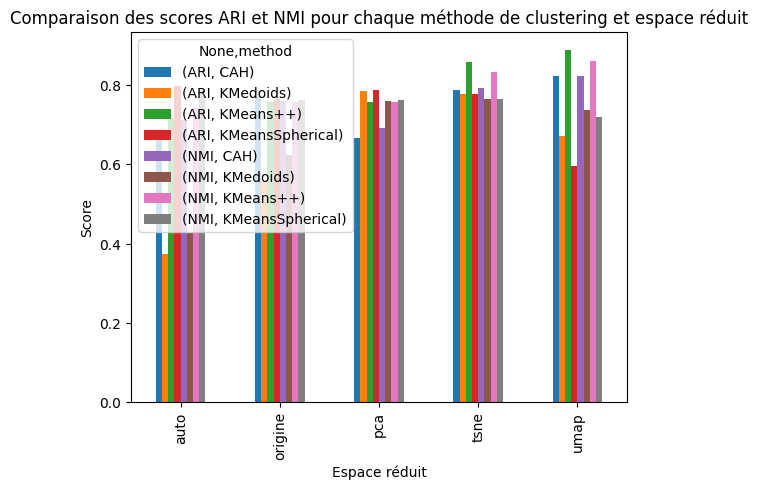

In [178]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
df_table.plot(kind='bar')

# Set the title and axis labels
plt.title('Comparaison des scores ARI et NMI pour chaque méthode de clustering et espace réduit')
plt.xlabel('Espace réduit')
plt.ylabel('Score')

# Show the plot
plt.show()

En analysant ce tableau et cet figure, on peut voir que les meilleurs espaces réduits étaient UMAP et t-SNE. Cela peut s'expliquer par le fait que ces deux techniques de réduction de dimensionnalité sont connues pour leur capacité à préserver les structures non linéaires des données d'origine. De plus, les clusters obtenus en utilisant UMAP et t-SNE semblaient plus séparables que ceux obtenus à partir d'autres espaces réduits.

En ce qui concerne la meilleure méthode de clustering, on peut constater que la méthode Kmeans++ a donné les meilleurs résultats en termes de scores NMI et ARI dans l'espace réduit UMAP.

### Une interprétation des classes:

Nous allons désormais nous concentrer sur l'analyse des clusters obtenus par la méthode Kmeans++ dans l'espace UMAP, étant donné que cela a donné le meilleur résultat en termes de scores ARI et NMI. Nous allons examiner les caractéristiques des différents clusters pour mieux comprendre les relations entre les différents groupes de données.

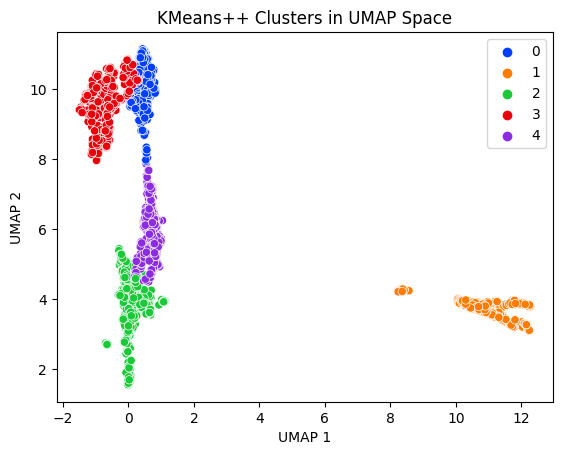

In [186]:
import seaborn as sns

kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
# Convert DataFrame to NumPy array
X = df3_umap.iloc[:, :-1].to_numpy()
# Fit the model on the data
kmeans_pp.fit(X)
# Get the cluster labels for each data point
kmeans_pp_labels = kmeans_pp.labels_
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df3_umap.iloc[:, 0], y=df3_umap.iloc[:, 1], hue=kmeans_pp_labels, palette='bright')
# Add axis labels and a title
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('KMeans++ Clusters in UMAP Space')

# Show the plot
plt.show()

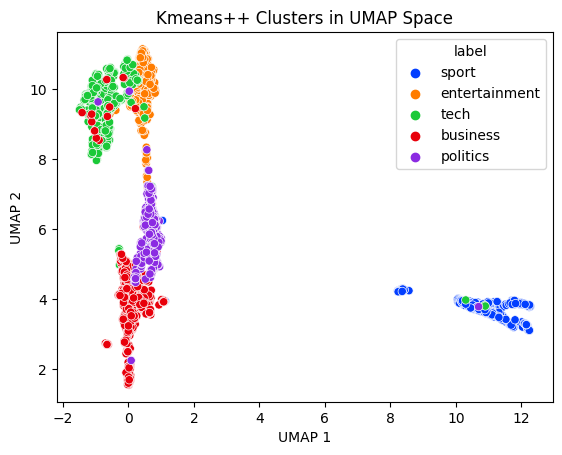

In [188]:
# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=df3_umap.iloc[:, 0], y=df3_umap.iloc[:, 1], hue=df3_umap['label'], palette='bright')

# Add axis labels and a title
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Kmeans++ Clusters in UMAP Space')

# Show the plot
plt.show()

En examinant les deux nuages de points, nous pouvons remarquer que les points du cluster 0 correspond à la classe "entertaiment" dans la variable "label" de notre dataframe. De même, les points du cluster 1 correspondant à la classe "sport". De même, les points du cluster 2 correspondant à la classe "business". De même, les points du cluster 3 correspondant à la classe "tech". Et enfin les points de cluster 4 correspondent à la classe "politics".\
 Ces observations indiquent que le clustering a réussi à regrouper les données en fonction de leur appartenance à l'une des cinq classes de la variable "label". Cela montre que le modèle de clustering KMeans++ appliqué sur l'espace UMAP a été efficace pour séparer les données en fonction de leurs caractéristiques, en permettant d'identifier des groupes similaires au sein de chaque classe.

### Nombre de cluster

Dans cette partie, nous allons étudier le choix du nombre de clusters dans notre modèle de clustering. Il existe plusieurs méthodes pour déterminer le nombre optimal de clusters, comme la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method). Cependant, nous allons utiliser uniquement la méthode du k-means++ dans cette partie.

In [189]:
import warnings
warnings.filterwarnings("ignore")

### 1. Elbow method

1. Espace d'origine 

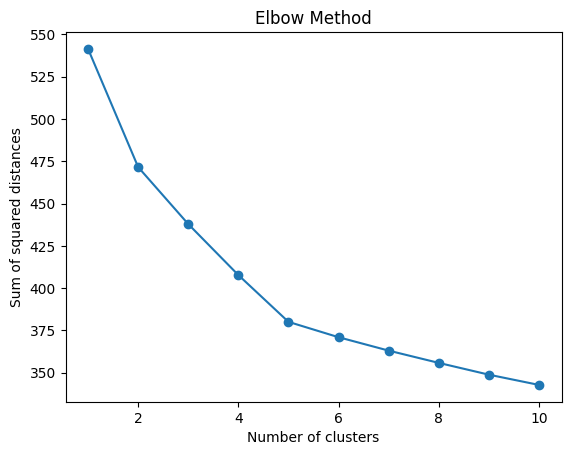

In [190]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_embeddings.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

2. PCA

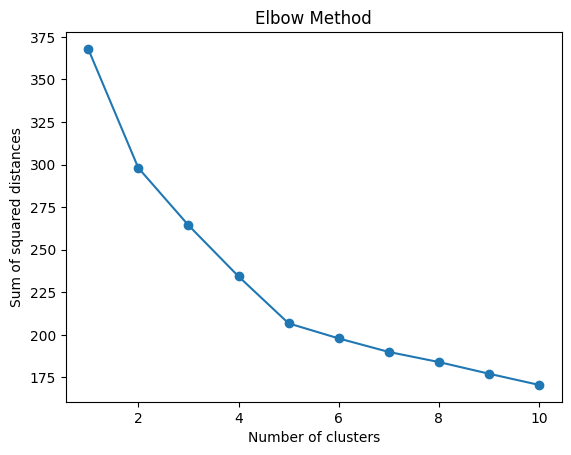

In [191]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_pca.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

3. t-SNE 

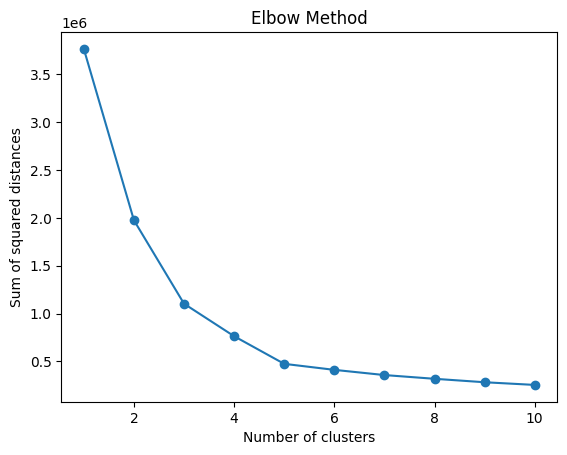

In [192]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_tsne.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

4. UMAP

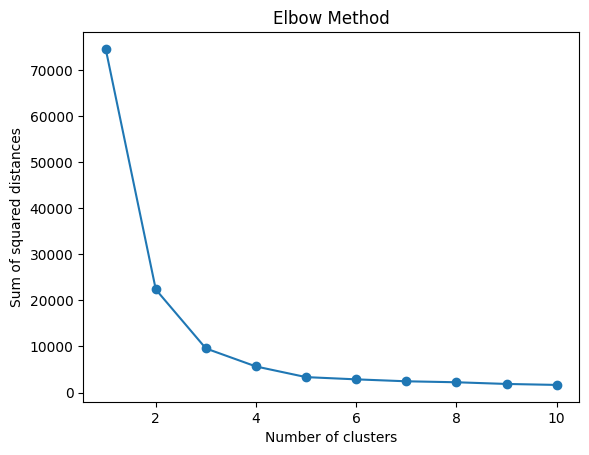

In [193]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_umap.iloc[:, :-1])
    ssd.append(kmeans.inertia_)
# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

5. Autoencodeur 

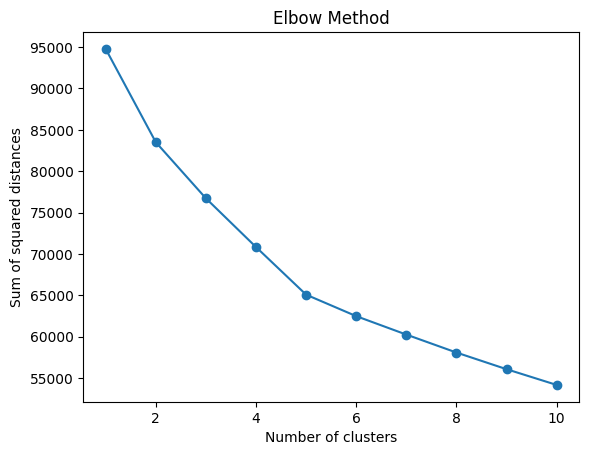

In [194]:
# Compute sum of squared distances for values of k from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3_encoded.iloc[:, :-1])
    ssd.append(kmeans.inertia_)

# Plot the results in a line graph
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')
plt.show()

D'après les résultats de l'analyse avec la méthode Elbow, il a été déterminé que le nombre de clusters optimal pour les données de notre ensemble de données était de cinq. Ce résultat a été observé sur l'ensemble des espaces de projection, ce qui renforce la confiance dans la validité de ce nombre optimal de clusters. Ainsi, nous pouvons conclure que le meilleur partitionnement de notre ensemble de données en clusters doit être effectué en utilisant cinq clusters.

### 2. Silhouette method 

Le silhouette method est une autre technique couramment utilisée pour déterminer le nombre optimal de clusters dans une analyse de clustering. Cette méthode utilise une mesure de la qualité de la partition en cluster appelée silhouette score, qui mesure à quel point chaque point de données est similaire à son propre cluster par rapport aux autres clusters.

In [195]:
from sklearn.metrics import silhouette_score

1. Espace d'origine 

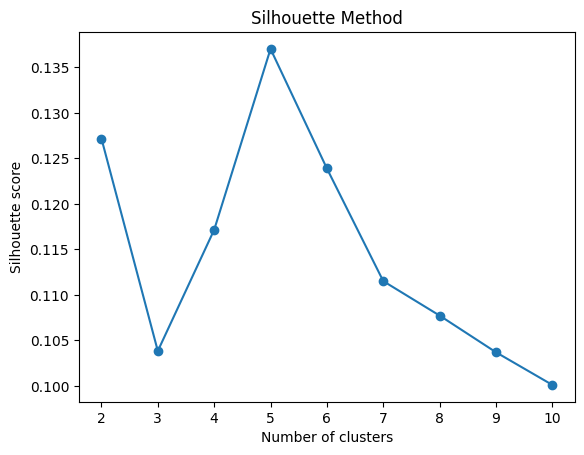

In [196]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df3_embeddings.iloc[:, :-1])
    silhouette_avg = silhouette_score(df3_embeddings.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(silhouette_avg)
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

2. PCA 

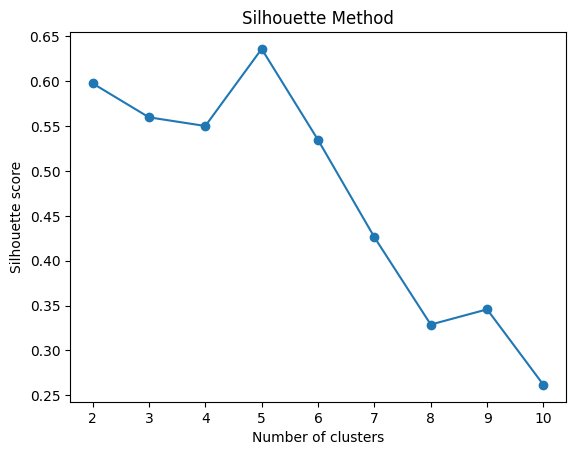

In [197]:
from sklearn.metrics import silhouette_score

# Convert DataFrame to NumPy array
X_pca = df3_pca.to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

3. t-SNE 

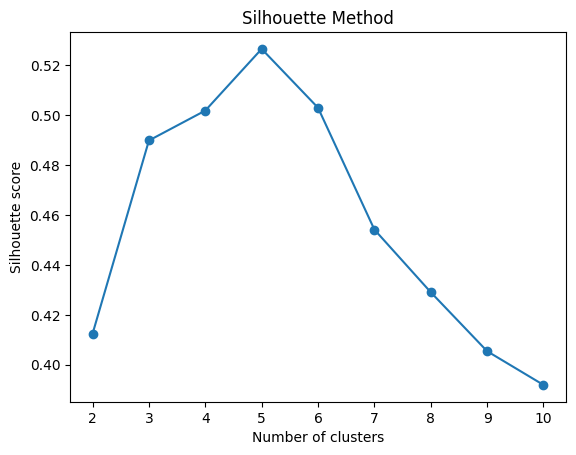

In [198]:
# Convert DataFrame to NumPy array
X_tsne = df3_tsne[['x', 'y']].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_tsne)
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

4. UMAP

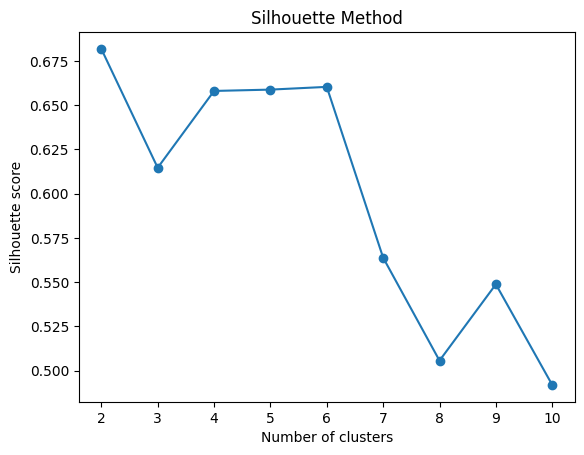

In [199]:
# Convert DataFrame to NumPy array
X_umap = df3_umap.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

5. Autoencodeur 

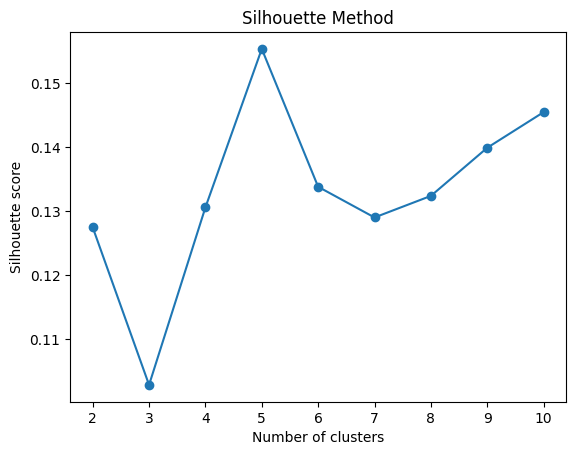

In [200]:
# Convert DataFrame to NumPy array
X_auto = df3_encoded.iloc[:, :-1].to_numpy()

# Compute silhouette score for values of k from 2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_auto)
    silhouette_avg = silhouette_score(X_auto, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the results in a line graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

En utilisant la méthode de Silhouette, nous avons également constaté que le nombre optimal de clusters pour notre ensemble de données est de cinq car ce nombre de cluster represente la valeur maximal du score de silhoute dans tous les espaces . 

# Partie 2 : Approche jointe/simultanée

## 1. Reduced Kmeans

Nous avons utilisé la bibliothèque R "clustrd" [2] pour appliquer des méthodes combinant simultanément les méthodes de réduction de dimension et de clustering. Pour ce faire, nous avons écrit un script R qui nous donne les labels de clusters pour chaque dataframe et les enregistre dans un fichier txt. Nous utiliserons ensuite Python pour étudier les performances.

Les fonctions clusmca() et cluspca() sont toutes deux des fonctions de la librairie R clustrd qui combinent des méthodes de réduction de dimension et de clustering pour effectuer l'analyse de cluster.

La différence entre les deux fonctions est le type de méthode de réduction de dimension qu'elles utilisent. clusmca() utilise l'analyse en composantes multiples (MCA) pour réduire la dimension des données, tandis que cluspca() utilise l'analyse en composantes principales (PCA).

L'analyse en composantes multiples est une méthode de réduction de dimension qui est utilisée pour les données catégorielles et nominales, tandis que l'analyse en composantes principales est utilisée pour les données quantitatives et continues.

Comme notre jeu de données est purement numérique (embedded data), il n'est pas nécessaire d'utiliser clusmca() car cette fonction est conçue pour les données catégorielles et nominales. Nous allons plutôt utiliser cluspca() qui utilise l'analyse en composantes principales (PCA) pour réduire la dimension des données.

In [ ]:
### Code R ###
#install.packages("clustrd")
#library(clustrd)
#df1_embeddings <- read.csv("df1_embeddings.csv")
#nbclus=3
#ndim=50
#outRKM = cluspca(df1_embeddings[, 1:(ncol(df1_embeddings)-1)]
#, nbclus, ndim, method = "RKM", rotation = "varimax", scale = FALSE, nstart = 10)
#
#
#true_labels = df1_embeddings[101]
#
## Obtenir les étiquettes de cluster à partir de la sortie de cluspca
#
#cluster_labels <- outRKM$cluster
#
#cluster_labels-1
#
#write.table(cluster_labels-1, "cluster_labels.txt", row.names = FALSE, col.names = FALSE)

In [202]:
with open("w2v_R/cluster_labels3.txt", "r") as f:
    RKM_labels = f.read().splitlines()

print(RKM_labels)

['2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '1', '1', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '0', '1', '2', '2', '2', '1', '2', '2', '2', '2', '2', '1', '2', '2', '2', '2', '2', '1', '2',

In [203]:
nmi_reduced_Kmeans = normalized_mutual_info_score(true_labels, RKM_labels)
ari_reduced_Kmeans = adjusted_rand_score(true_labels, RKM_labels)

print("NMI:", nmi_reduced_Kmeans)
print("ARI:", ari_reduced_Kmeans)

NMI: 0.6544135242459235
ARI: 0.5911429220299731


En comparant les résultats d'ARI et de NMI obtenus par la fonction cluspca, nous avons constaté que les résultats obtenue en utilisant l'approche tendem sont plus élevé que l'approche jointe. En effet, cluspca utilise la PCA pour réduire la dimensionnalité de la donnée numérique, puis applique une méthode de clustering sur les composantes principales pour trouver les groupes similaires.

## Deep Kmeans 

Après avoir installé le fichier GitHub https://github.com/MaziarMF/deep-k-means localement et effectué de petits changements sur le fichier **dkm.py** ainsi que supprimé les fichiers inutiles et créé trois nouveaux fichiers en nous basant sur le fichier _20news_specs.py, :

1. bbc_specs.py
2. classic3_specs.py
3. classic4_specs.py

Nous avons exécuté la commande suivante dans le terminal :

**`path/to/dkm.py/>python dkm.py -d BBC -p`**

On a eu un ARI = 0.82, un NMI = 0,79 et une accuracy de 0.92

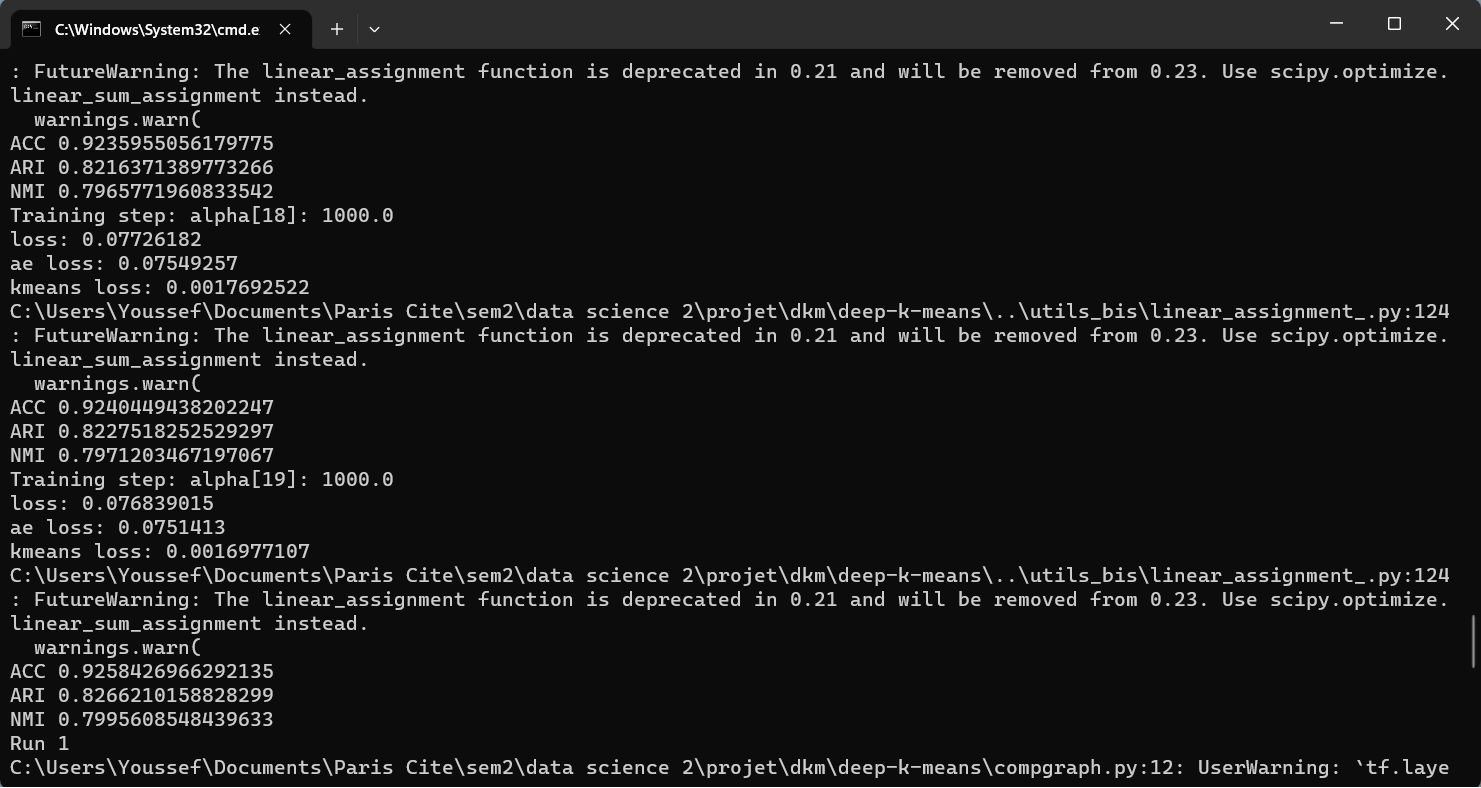

Les résultats obtenus avec cette méthode sont globalement satisfaisants. Cependant, il est important de souligner que cette méthode est relativement complexe, notamment en termes de temps d'exécution. De plus, nous ne sommes pas encore très familiers avec les concepts sous-jacents du deep learning, ce qui peut rendre la mise en œuvre de cette méthode plus difficile pour nous.

En outre, il convient de noter que les méthodes classiques semblent fournir de meilleurs résultats en termes de NMI, ARI et accuracy. C'est pourquoi nous avons finalement opté pour l'utilisation de ces méthodes plus traditionnelles dans notre étude. Toutefois, cela ne signifie pas que nous excluons la possibilité d'utiliser des méthodes de deep learning à l'avenir si cela s'avère nécessaire ou pertinent pour nos travaux futurs.

# Conclusion 

Dans ce projet, nous avons appris deux approches de clustering. La première approche consiste à utiliser des méthodes de réduction de dimension pour ensuite appliquer un algorithme de clustering. Cette approche est également connue sous le nom d'approche en tandem. La deuxième approche consiste à utiliser des algorithmes qui combinent à la fois la réduction de dimension et le clustering. Cette approche est également connue sous le nom d'approche jointe.

Pour la réalisation de ce projet, nous avons utilisé 3 ensembles de données : "classic3", "classic4" et "BBC". Chaque ensemble de données est constitué d'une colonne texte contenant des articles et d'une colonne label contenant la catégorie de chaque article. L'objectif de ce travail était de réaliser un clustering des articles, puis d'évaluer la performance du modèle en utilisant les labels.

Pour la première approche (approche tandem), nous avons utilisé trois méthodes de réduction de dimension différentes : la méthode PCA, t-SNE, UMAP ainsi qu'un autoencodeur. Nous avons également utilisé l'espace d'origine sans l'application de réduction. Pour chaque méthode, nous avons appliqué quatre algorithmes de clustering différents : Kmeans++, Kmedoids, Spherical Kmeans et CAH avec ses différents linkages. Nous avons ensuite évaluer la performance de chaque algorithme dans chaque espace en utilisant les métrique NMI et ARI.

- Pour le premier dataset (classic3), nous avons choisi de fixer le nombre de clusters à trois car nous avions trois labels différents. Nous avons obtenu de bons scores de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode qui a donné les résultats les plus élevés était le K-means sphérique dans l'espace t-SNE, où le NMI a atteint un score de 96% et l'ARI a atteint un score de 98%. Cela suggère que les données ont des similitudes ou des caractéristiques communes qui peuvent être utilisées pour les regrouper en différents clusters. Pour nous assurer que nous avions choisi le bon nombre de clusters, nous avons utilisé les deux méthodes : la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method), qui ont confirmé notre choix. 
- Pour le deuxième dataset (classic4) nous avons choisi de fixer le nombre de clusters à quatre car nous avions quatre labels différents. Nous avons obtenu des scores non satisfaisant de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode CAH a donné les meilleurs résultats en termes de scores NMI dans l'espace réduit t-SNE et Spherical Kmeans a donné les meilleurs résultat en terme de score ARI dans l'espace réduit UMAP.
Ces résultats suggére que les données ne sont pas naturellement divisibles en clusters distincts, ce que nous avons remarqué grâce aux plot plus haut.  Pour nous assurer que nous avions choisi le bon nombre de clusters, nous avons utilisé les deux méthodes : la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method), qui ont confirmé notre choix. 
-  Pour le troisième dataset (BBC) nous avons choisi de fixer le nombre de clusters à cinq car nous avions quatre labels différents. Nous avons obtenu des scores satisfaisant de NMI et ARI avec la plupart des algorithmes dans les différents espaces. Cependant, la méthode Kmeans++ a donné les meilleurs résultats en termes de scores NMI et ARI dans l'espace réduit UMAP.
suggère que les données ont des similitudes ou des caractéristiques communes qui peuvent être utilisées pour les regrouper en différents clusters.  Pour nous assurer que nous avions choisi le bon nombre de clusters, nous avons utilisé les deux méthodes : la méthode du coude (elbow method) et la méthode de la silhouette (silhouette method), qui ont confirmé notre choix. 


Pour la deuxième approche (approche jointe), nous avons utilisé deux algorithmes : le Reduced Kmeans et le Deep Kmeans. L'algorithme Reduced Kmeans est disponible uniquement sous R dans la fonction cluspca(). Pour cette raison, nous avons utilisé un code R pour appliquer cet algorithme aux vecteurs d'embedding, puis nous avons récupéré les résultats du clustering de la fonction dans un fichier texte. Ensuite, nous avons évalué le modèle avec les métriques NMI et ARI sous Python. Nous avons remarqué que les résultats de cette approche ne sont pas différents des résultats de l'approche tandem. Cela est dû au fait que la fonction utilise la réduction PCA puis applique le K-means au sein de la même fonction, alors que dans l'approche tandem, cela se fait séparément.